In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy import sparse
import random
from scipy.integrate import solve_ivp
import functools

dft = pd.read_excel('data.xlsx', sheet_name='TemperatureMatrix')
Tmatrix = dft.iloc[:,:]
T = pd.DataFrame(Tmatrix).to_numpy()
T = np.int_(T)

In [2]:
betanonorm = T
Ni = betanonorm.shape[0]
Nj = betanonorm.shape[1]
rpval = []
cpval = []
raval = []
caval = []
aval  = []
Gval  = []
wval  = []
norm0 = []
Pinit    = np.zeros([Ni,1])
Ainit    = np.zeros([Ni,1])
Finit    = np.zeros([Ni,1])
sigmapval = np.zeros([Ni,Nj])
sigmaaval = np.zeros([Ni,Nj])
betainit = np.zeros([Ni,Nj])
for l in range(Ni):
    rpval.append(random.uniform(0, 0.1))
    cpval.append(random.uniform(0, 0.1))
    wval.append(random.uniform(0, 0.1))
    Pinit[l][0] = random.uniform(0, 0.1)
    Finit[l][0] = random.uniform(0, 1)
    aval.append( random.betavariate(2, 5))
    if l<Nj:
        Ainit[l][0] = random.uniform(0, 0.1)
    else:
        Ainit[l][0] = 0
for l in range(Nj):
    raval.append(random.uniform(0, 0.1))
    caval.append(random.uniform(0, 0.1))
    Gval.append(random.uniform(1, 2))
for j in range(Nj):
    sumprev = []
    for i in range(Ni):
        sigmapval[i][j] = random.uniform(0, 0.1)
        sigmaaval[i][j] = random.uniform(0, 0.1)
        sumprev.append(betanonorm[i][j])
        resultpar = sum(sumprev)
    norm0.append(resultpar)


for i in range(Ni):
    for j in range(Nj):
        betainit[i][j] = (betanonorm[i][j])/(norm0[j])

P    = np.zeros([Ni,1])
A    = np.zeros([Ni,1])
F    = np.zeros([Ni,1])
beta = np.zeros([Ni,Nj])
zd = np.concatenate((P,A,F,beta), 1)
zd0 = np.concatenate((Pinit,Ainit,Finit,betainit), 1)

In [3]:
#z  = np.transpose(zd)
#z0 = np.transpose(zd0)

In [4]:
def odescomp(t,y,rp, cp, ra, ca, a, G, sigmap, sigmaa, w):
    #y = np.transpose(yst)
    
    p0=y[0][0]
    p1=y[12][0]
    p2=y[24][0]
    p3=y[36][0]
    p4=y[48][0]
    p5=y[60][0]
    p6=y[72][0]
    p7=y[84][0]
    p8=y[96][0]
    p9=y[108][0]
    p10=y[120][0]
    p11=y[132][0]
    p12=y[144][0]
    p13=y[156][0]
    p14=y[168][0]
    p15=y[180][0]
    p16=y[192][0]
    p17=y[204][0]
    p18=y[216][0]
    p19=y[228][0]
    p20=y[240][0]
    p21=y[252][0]
    p22=y[264][0]
    p23=y[276][0]
    p24=y[288][0]
    p25=y[300][0]
    p26=y[312][0]
    p27=y[324][0]
    p28=y[336][0]
    p29=y[348][0]
    p30=y[360][0]

    A0=y[1][0]
    A1=y[13][0]
    A2=y[25][0]
    A3=y[37][0]
    A4=y[49][0]
    A5=y[61][0]
    A6=y[73][0]
    A7=y[85][0]
    A8=y[97][0]
    A9=y[109][0]
    A10=y[121][0]
    A11=y[133][0]
    A12=y[145][0]
    A13=y[157][0]
    A14=y[169][0]
    A15=y[181][0]
    A16=y[193][0]
    A17=y[205][0]
    A18=y[217][0]
    A19=y[229][0]
    A20=y[241][0]
    A21=y[253][0]
    A22=y[265][0]
    A23=y[277][0]
    A24=y[289][0]
    A25=y[301][0]
    A26=y[313][0]
    A27=y[325][0]
    A28=y[337][0]
    A29=y[349][0]
    A30=y[361][0]

    F0=y[2][0]
    F1=y[14][0]
    F2=y[26][0]
    F3=y[38][0]
    F4=y[50][0]
    F5=y[62][0]
    F6=y[74][0]
    F7=y[86][0]
    F8=y[98][0]
    F9=y[110][0]
    F10=y[122][0]
    F11=y[134][0]
    F12=y[146][0]
    F13=y[158][0]
    F14=y[170][0]
    F15=y[182][0]
    F16=y[194][0]
    F17=y[206][0]
    F18=y[218][0]
    F19=y[230][0]
    F20=y[242][0]
    F21=y[254][0]
    F22=y[266][0]
    F23=y[278][0]
    F24=y[290][0]
    F25=y[302][0]
    F26=y[314][0]
    F27=y[326][0]
    F28=y[338][0]
    F29=y[350][0]
    F30=y[362][0]

    b00=y[3][0]
    b10=y[15][0]
    b20=y[27][0]
    b30=y[39][0]
    b40=y[51][0]
    b50=y[63][0]
    b60=y[75][0]
    b70=y[87][0]
    b80=y[99][0]
    b90=y[111][0]
    b100=y[123][0]
    b110=y[135][0]
    b120=y[147][0]
    b130=y[159][0]
    b140=y[171][0]
    b150=y[183][0]
    b160=y[195][0]
    b170=y[207][0]
    b180=y[219][0]
    b190=y[231][0]
    b200=y[243][0]
    b210=y[255][0]
    b220=y[267][0]
    b230=y[279][0]
    b240=y[291][0]
    b250=y[303][0]
    b260=y[315][0]
    b270=y[327][0]
    b280=y[339][0]
    b290=y[351][0]
    b300=y[363][0]
    b01=y[4][0]
    b11=y[16][0]
    b21=y[28][0]
    b31=y[40][0]
    b41=y[52][0]
    b51=y[64][0]
    b61=y[76][0]
    b71=y[88][0]
    b81=y[100][0]
    b91=y[112][0]
    b101=y[124][0]
    b111=y[136][0]
    b121=y[148][0]
    b131=y[160][0]
    b141=y[172][0]
    b151=y[184][0]
    b161=y[196][0]
    b171=y[208][0]
    b181=y[220][0]
    b191=y[232][0]
    b201=y[244][0]
    b211=y[256][0]
    b221=y[268][0]
    b231=y[280][0]
    b241=y[292][0]
    b251=y[304][0]
    b261=y[316][0]
    b271=y[328][0]
    b281=y[340][0]
    b291=y[352][0]
    b301=y[364][0]
    b02=y[5][0]
    b12=y[17][0]
    b22=y[29][0]
    b32=y[41][0]
    b42=y[53][0]
    b52=y[65][0]
    b62=y[77][0]
    b72=y[89][0]
    b82=y[101][0]
    b92=y[113][0]
    b102=y[125][0]
    b112=y[137][0]
    b122=y[149][0]
    b132=y[161][0]
    b142=y[173][0]
    b152=y[185][0]
    b162=y[197][0]
    b172=y[209][0]
    b182=y[221][0]
    b192=y[233][0]
    b202=y[245][0]
    b212=y[257][0]
    b222=y[269][0]
    b232=y[281][0]
    b242=y[293][0]
    b252=y[305][0]
    b262=y[317][0]
    b272=y[329][0]
    b282=y[341][0]
    b292=y[353][0]
    b302=y[365][0]
    b03=y[6][0]
    b13=y[18][0]
    b23=y[30][0]
    b33=y[42][0]
    b43=y[54][0]
    b53=y[66][0]
    b63=y[78][0]
    b73=y[90][0]
    b83=y[102][0]
    b93=y[114][0]
    b103=y[126][0]
    b113=y[138][0]
    b123=y[150][0]
    b133=y[162][0]
    b143=y[174][0]
    b153=y[186][0]
    b163=y[198][0]
    b173=y[210][0]
    b183=y[222][0]
    b193=y[234][0]
    b203=y[246][0]
    b213=y[258][0]
    b223=y[270][0]
    b233=y[282][0]
    b243=y[294][0]
    b253=y[306][0]
    b263=y[318][0]
    b273=y[330][0]
    b283=y[342][0]
    b293=y[354][0]
    b303=y[366][0]
    b04=y[7][0]
    b14=y[19][0]
    b24=y[31][0]
    b34=y[43][0]
    b44=y[55][0]
    b54=y[67][0]
    b64=y[79][0]
    b74=y[91][0]
    b84=y[103][0]
    b94=y[115][0]
    b104=y[127][0]
    b114=y[139][0]
    b124=y[151][0]
    b134=y[163][0]
    b144=y[175][0]
    b154=y[187][0]
    b164=y[199][0]
    b174=y[211][0]
    b184=y[223][0]
    b194=y[235][0]
    b204=y[247][0]
    b214=y[259][0]
    b224=y[271][0]
    b234=y[283][0]
    b244=y[295][0]
    b254=y[307][0]
    b264=y[319][0]
    b274=y[331][0]
    b284=y[343][0]
    b294=y[355][0]
    b304=y[367][0]
    b05=y[8][0]
    b15=y[20][0]
    b25=y[32][0]
    b35=y[44][0]
    b45=y[56][0]
    b55=y[68][0]
    b65=y[80][0]
    b75=y[92][0]
    b85=y[104][0]
    b95=y[116][0]
    b105=y[128][0]
    b115=y[140][0]
    b125=y[152][0]
    b135=y[164][0]
    b145=y[176][0]
    b155=y[188][0]
    b165=y[200][0]
    b175=y[212][0]
    b185=y[224][0]
    b195=y[236][0]
    b205=y[248][0]
    b215=y[260][0]
    b225=y[272][0]
    b235=y[284][0]
    b245=y[296][0]
    b255=y[308][0]
    b265=y[320][0]
    b275=y[332][0]
    b285=y[344][0]
    b295=y[356][0]
    b305=y[368][0]
    b06=y[9][0]
    b16=y[21][0]
    b26=y[33][0]
    b36=y[45][0]
    b46=y[57][0]
    b56=y[69][0]
    b66=y[81][0]
    b76=y[93][0]
    b86=y[105][0]
    b96=y[117][0]
    b106=y[129][0]
    b116=y[141][0]
    b126=y[153][0]
    b136=y[165][0]
    b146=y[177][0]
    b156=y[189][0]
    b166=y[201][0]
    b176=y[213][0]
    b186=y[225][0]
    b196=y[237][0]
    b206=y[249][0]
    b216=y[261][0]
    b226=y[273][0]
    b236=y[285][0]
    b246=y[297][0]
    b256=y[309][0]
    b266=y[321][0]
    b276=y[333][0]
    b286=y[345][0]
    b296=y[357][0]
    b306=y[369][0]
    b07=y[10][0]
    b17=y[22][0]
    b27=y[34][0]
    b37=y[46][0]
    b47=y[58][0]
    b57=y[70][0]
    b67=y[82][0]
    b77=y[94][0]
    b87=y[106][0]
    b97=y[118][0]
    b107=y[130][0]
    b117=y[142][0]
    b127=y[154][0]
    b137=y[166][0]
    b147=y[178][0]
    b157=y[190][0]
    b167=y[202][0]
    b177=y[214][0]
    b187=y[226][0]
    b197=y[238][0]
    b207=y[250][0]
    b217=y[262][0]
    b227=y[274][0]
    b237=y[286][0]
    b247=y[298][0]
    b257=y[310][0]
    b267=y[322][0]
    b277=y[334][0]
    b287=y[346][0]
    b297=y[358][0]
    b307=y[370][0]
    b08=y[11][0]
    b18=y[23][0]
    b28=y[35][0]
    b38=y[47][0]
    b48=y[59][0]
    b58=y[71][0]
    b68=y[83][0]
    b78=y[95][0]
    b88=y[107][0]
    b98=y[119][0]
    b108=y[131][0]
    b118=y[143][0]
    b128=y[155][0]
    b138=y[167][0]
    b148=y[179][0]
    b158=y[191][0]
    b168=y[203][0]
    b178=y[215][0]
    b188=y[227][0]
    b198=y[239][0]
    b208=y[251][0]
    b218=y[263][0]
    b228=y[275][0]
    b238=y[287][0]
    b248=y[299][0]
    b258=y[311][0]
    b268=y[323][0]
    b278=y[335][0]
    b288=y[347][0]
    b298=y[359][0]
    b308=y[371][0]

    dp0=(rp[0]*p0)-(cp[0]*(p0)**2)+sigmap[0][0]*b00*F0*A0+sigmap[0][1]*b01*F0*A1+sigmap[0][2]*b02*F0*A2+sigmap[0][3]*b03*F0*A3+sigmap[0][4]*b04*F0*A4+sigmap[0][5]*b05*F0*A5+sigmap[0][6]*b06*F0*A6+sigmap[0][7]*b07*F0*A7+sigmap[0][8]*b08*F0*A8
    dp1=(rp[1]*p1)-(cp[1]*(p1)**2)+sigmap[1][0]*b10*F1*A0+sigmap[1][1]*b11*F1*A1+sigmap[1][2]*b12*F1*A2+sigmap[1][3]*b13*F1*A3+sigmap[1][4]*b14*F1*A4+sigmap[1][5]*b15*F1*A5+sigmap[1][6]*b16*F1*A6+sigmap[1][7]*b17*F1*A7+sigmap[1][8]*b18*F1*A8
    dp2=(rp[2]*p2)-(cp[2]*(p2)**2)+sigmap[2][0]*b20*F2*A0+sigmap[2][1]*b21*F2*A1+sigmap[2][2]*b22*F2*A2+sigmap[2][3]*b23*F2*A3+sigmap[2][4]*b24*F2*A4+sigmap[2][5]*b25*F2*A5+sigmap[2][6]*b26*F2*A6+sigmap[2][7]*b27*F2*A7+sigmap[2][8]*b28*F2*A8
    dp3=(rp[3]*p3)-(cp[3]*(p3)**2)+sigmap[3][0]*b30*F3*A0+sigmap[3][1]*b31*F3*A1+sigmap[3][2]*b32*F3*A2+sigmap[3][3]*b33*F3*A3+sigmap[3][4]*b34*F3*A4+sigmap[3][5]*b35*F3*A5+sigmap[3][6]*b36*F3*A6+sigmap[3][7]*b37*F3*A7+sigmap[3][8]*b38*F3*A8
    dp4=(rp[4]*p4)-(cp[4]*(p4)**2)+sigmap[4][0]*b40*F4*A0+sigmap[4][1]*b41*F4*A1+sigmap[4][2]*b42*F4*A2+sigmap[4][3]*b43*F4*A3+sigmap[4][4]*b44*F4*A4+sigmap[4][5]*b45*F4*A5+sigmap[4][6]*b46*F4*A6+sigmap[4][7]*b47*F4*A7+sigmap[4][8]*b48*F4*A8
    dp5=(rp[5]*p5)-(cp[5]*(p5)**2)+sigmap[5][0]*b50*F5*A0+sigmap[5][1]*b51*F5*A1+sigmap[5][2]*b52*F5*A2+sigmap[5][3]*b53*F5*A3+sigmap[5][4]*b54*F5*A4+sigmap[5][5]*b55*F5*A5+sigmap[5][6]*b56*F5*A6+sigmap[5][7]*b57*F5*A7+sigmap[5][8]*b58*F5*A8
    dp6=(rp[6]*p6)-(cp[6]*(p6)**2)+sigmap[6][0]*b60*F6*A0+sigmap[6][1]*b61*F6*A1+sigmap[6][2]*b62*F6*A2+sigmap[6][3]*b63*F6*A3+sigmap[6][4]*b64*F6*A4+sigmap[6][5]*b65*F6*A5+sigmap[6][6]*b66*F6*A6+sigmap[6][7]*b67*F6*A7+sigmap[6][8]*b68*F6*A8
    dp7=(rp[7]*p7)-(cp[7]*(p7)**2)+sigmap[7][0]*b70*F7*A0+sigmap[7][1]*b71*F7*A1+sigmap[7][2]*b72*F7*A2+sigmap[7][3]*b73*F7*A3+sigmap[7][4]*b74*F7*A4+sigmap[7][5]*b75*F7*A5+sigmap[7][6]*b76*F7*A6+sigmap[7][7]*b77*F7*A7+sigmap[7][8]*b78*F7*A8
    dp8=(rp[8]*p8)-(cp[8]*(p8)**2)+sigmap[8][0]*b80*F8*A0+sigmap[8][1]*b81*F8*A1+sigmap[8][2]*b82*F8*A2+sigmap[8][3]*b83*F8*A3+sigmap[8][4]*b84*F8*A4+sigmap[8][5]*b85*F8*A5+sigmap[8][6]*b86*F8*A6+sigmap[8][7]*b87*F8*A7+sigmap[8][8]*b88*F8*A8
    dp9=(rp[9]*p9)-(cp[9]*(p9)**2)+sigmap[9][0]*b90*F9*A0+sigmap[9][1]*b91*F9*A1+sigmap[9][2]*b92*F9*A2+sigmap[9][3]*b93*F9*A3+sigmap[9][4]*b94*F9*A4+sigmap[9][5]*b95*F9*A5+sigmap[9][6]*b96*F9*A6+sigmap[9][7]*b97*F9*A7+sigmap[9][8]*b98*F9*A8
    dp10=(rp[10]*p10)-(cp[10]*(p10)**2)+sigmap[10][0]*b100*F10*A0+sigmap[10][1]*b101*F10*A1+sigmap[10][2]*b102*F10*A2+sigmap[10][3]*b103*F10*A3+sigmap[10][4]*b104*F10*A4+sigmap[10][5]*b105*F10*A5+sigmap[10][6]*b106*F10*A6+sigmap[10][7]*b107*F10*A7+sigmap[10][8]*b108*F10*A8
    dp11=(rp[11]*p11)-(cp[11]*(p11)**2)+sigmap[11][0]*b110*F11*A0+sigmap[11][1]*b111*F11*A1+sigmap[11][2]*b112*F11*A2+sigmap[11][3]*b113*F11*A3+sigmap[11][4]*b114*F11*A4+sigmap[11][5]*b115*F11*A5+sigmap[11][6]*b116*F11*A6+sigmap[11][7]*b117*F11*A7+sigmap[11][8]*b118*F11*A8
    dp12=(rp[12]*p12)-(cp[12]*(p12)**2)+sigmap[12][0]*b120*F12*A0+sigmap[12][1]*b121*F12*A1+sigmap[12][2]*b122*F12*A2+sigmap[12][3]*b123*F12*A3+sigmap[12][4]*b124*F12*A4+sigmap[12][5]*b125*F12*A5+sigmap[12][6]*b126*F12*A6+sigmap[12][7]*b127*F12*A7+sigmap[12][8]*b128*F12*A8
    dp13=(rp[13]*p13)-(cp[13]*(p13)**2)+sigmap[13][0]*b130*F13*A0+sigmap[13][1]*b131*F13*A1+sigmap[13][2]*b132*F13*A2+sigmap[13][3]*b133*F13*A3+sigmap[13][4]*b134*F13*A4+sigmap[13][5]*b135*F13*A5+sigmap[13][6]*b136*F13*A6+sigmap[13][7]*b137*F13*A7+sigmap[13][8]*b138*F13*A8
    dp14=(rp[14]*p14)-(cp[14]*(p14)**2)+sigmap[14][0]*b140*F14*A0+sigmap[14][1]*b141*F14*A1+sigmap[14][2]*b142*F14*A2+sigmap[14][3]*b143*F14*A3+sigmap[14][4]*b144*F14*A4+sigmap[14][5]*b145*F14*A5+sigmap[14][6]*b146*F14*A6+sigmap[14][7]*b147*F14*A7+sigmap[14][8]*b148*F14*A8
    dp15=(rp[15]*p15)-(cp[15]*(p15)**2)+sigmap[15][0]*b150*F15*A0+sigmap[15][1]*b151*F15*A1+sigmap[15][2]*b152*F15*A2+sigmap[15][3]*b153*F15*A3+sigmap[15][4]*b154*F15*A4+sigmap[15][5]*b155*F15*A5+sigmap[15][6]*b156*F15*A6+sigmap[15][7]*b157*F15*A7+sigmap[15][8]*b158*F15*A8
    dp16=(rp[16]*p16)-(cp[16]*(p16)**2)+sigmap[16][0]*b160*F16*A0+sigmap[16][1]*b161*F16*A1+sigmap[16][2]*b162*F16*A2+sigmap[16][3]*b163*F16*A3+sigmap[16][4]*b164*F16*A4+sigmap[16][5]*b165*F16*A5+sigmap[16][6]*b166*F16*A6+sigmap[16][7]*b167*F16*A7+sigmap[16][8]*b168*F16*A8
    dp17=(rp[17]*p17)-(cp[17]*(p17)**2)+sigmap[17][0]*b170*F17*A0+sigmap[17][1]*b171*F17*A1+sigmap[17][2]*b172*F17*A2+sigmap[17][3]*b173*F17*A3+sigmap[17][4]*b174*F17*A4+sigmap[17][5]*b175*F17*A5+sigmap[17][6]*b176*F17*A6+sigmap[17][7]*b177*F17*A7+sigmap[17][8]*b178*F17*A8
    dp18=(rp[18]*p18)-(cp[18]*(p18)**2)+sigmap[18][0]*b180*F18*A0+sigmap[18][1]*b181*F18*A1+sigmap[18][2]*b182*F18*A2+sigmap[18][3]*b183*F18*A3+sigmap[18][4]*b184*F18*A4+sigmap[18][5]*b185*F18*A5+sigmap[18][6]*b186*F18*A6+sigmap[18][7]*b187*F18*A7+sigmap[18][8]*b188*F18*A8
    dp19=(rp[19]*p19)-(cp[19]*(p19)**2)+sigmap[19][0]*b190*F19*A0+sigmap[19][1]*b191*F19*A1+sigmap[19][2]*b192*F19*A2+sigmap[19][3]*b193*F19*A3+sigmap[19][4]*b194*F19*A4+sigmap[19][5]*b195*F19*A5+sigmap[19][6]*b196*F19*A6+sigmap[19][7]*b197*F19*A7+sigmap[19][8]*b198*F19*A8
    dp20=(rp[20]*p20)-(cp[20]*(p20)**2)+sigmap[20][0]*b200*F20*A0+sigmap[20][1]*b201*F20*A1+sigmap[20][2]*b202*F20*A2+sigmap[20][3]*b203*F20*A3+sigmap[20][4]*b204*F20*A4+sigmap[20][5]*b205*F20*A5+sigmap[20][6]*b206*F20*A6+sigmap[20][7]*b207*F20*A7+sigmap[20][8]*b208*F20*A8
    dp21=(rp[21]*p21)-(cp[21]*(p21)**2)+sigmap[21][0]*b210*F21*A0+sigmap[21][1]*b211*F21*A1+sigmap[21][2]*b212*F21*A2+sigmap[21][3]*b213*F21*A3+sigmap[21][4]*b214*F21*A4+sigmap[21][5]*b215*F21*A5+sigmap[21][6]*b216*F21*A6+sigmap[21][7]*b217*F21*A7+sigmap[21][8]*b218*F21*A8
    dp22=(rp[22]*p22)-(cp[22]*(p22)**2)+sigmap[22][0]*b220*F22*A0+sigmap[22][1]*b221*F22*A1+sigmap[22][2]*b222*F22*A2+sigmap[22][3]*b223*F22*A3+sigmap[22][4]*b224*F22*A4+sigmap[22][5]*b225*F22*A5+sigmap[22][6]*b226*F22*A6+sigmap[22][7]*b227*F22*A7+sigmap[22][8]*b228*F22*A8
    dp23=(rp[23]*p23)-(cp[23]*(p23)**2)+sigmap[23][0]*b230*F23*A0+sigmap[23][1]*b231*F23*A1+sigmap[23][2]*b232*F23*A2+sigmap[23][3]*b233*F23*A3+sigmap[23][4]*b234*F23*A4+sigmap[23][5]*b235*F23*A5+sigmap[23][6]*b236*F23*A6+sigmap[23][7]*b237*F23*A7+sigmap[23][8]*b238*F23*A8
    dp24=(rp[24]*p24)-(cp[24]*(p24)**2)+sigmap[24][0]*b240*F24*A0+sigmap[24][1]*b241*F24*A1+sigmap[24][2]*b242*F24*A2+sigmap[24][3]*b243*F24*A3+sigmap[24][4]*b244*F24*A4+sigmap[24][5]*b245*F24*A5+sigmap[24][6]*b246*F24*A6+sigmap[24][7]*b247*F24*A7+sigmap[24][8]*b248*F24*A8
    dp25=(rp[25]*p25)-(cp[25]*(p25)**2)+sigmap[25][0]*b250*F25*A0+sigmap[25][1]*b251*F25*A1+sigmap[25][2]*b252*F25*A2+sigmap[25][3]*b253*F25*A3+sigmap[25][4]*b254*F25*A4+sigmap[25][5]*b255*F25*A5+sigmap[25][6]*b256*F25*A6+sigmap[25][7]*b257*F25*A7+sigmap[25][8]*b258*F25*A8
    dp26=(rp[26]*p26)-(cp[26]*(p26)**2)+sigmap[26][0]*b260*F26*A0+sigmap[26][1]*b261*F26*A1+sigmap[26][2]*b262*F26*A2+sigmap[26][3]*b263*F26*A3+sigmap[26][4]*b264*F26*A4+sigmap[26][5]*b265*F26*A5+sigmap[26][6]*b266*F26*A6+sigmap[26][7]*b267*F26*A7+sigmap[26][8]*b268*F26*A8
    dp27=(rp[27]*p27)-(cp[27]*(p27)**2)+sigmap[27][0]*b270*F27*A0+sigmap[27][1]*b271*F27*A1+sigmap[27][2]*b272*F27*A2+sigmap[27][3]*b273*F27*A3+sigmap[27][4]*b274*F27*A4+sigmap[27][5]*b275*F27*A5+sigmap[27][6]*b276*F27*A6+sigmap[27][7]*b277*F27*A7+sigmap[27][8]*b278*F27*A8
    dp28=(rp[28]*p28)-(cp[28]*(p28)**2)+sigmap[28][0]*b280*F28*A0+sigmap[28][1]*b281*F28*A1+sigmap[28][2]*b282*F28*A2+sigmap[28][3]*b283*F28*A3+sigmap[28][4]*b284*F28*A4+sigmap[28][5]*b285*F28*A5+sigmap[28][6]*b286*F28*A6+sigmap[28][7]*b287*F28*A7+sigmap[28][8]*b288*F28*A8
    dp29=(rp[29]*p29)-(cp[29]*(p29)**2)+sigmap[29][0]*b290*F29*A0+sigmap[29][1]*b291*F29*A1+sigmap[29][2]*b292*F29*A2+sigmap[29][3]*b293*F29*A3+sigmap[29][4]*b294*F29*A4+sigmap[29][5]*b295*F29*A5+sigmap[29][6]*b296*F29*A6+sigmap[29][7]*b297*F29*A7+sigmap[29][8]*b298*F29*A8
    dp30=(rp[30]*p30)-(cp[30]*(p30)**2)+sigmap[30][0]*b300*F30*A0+sigmap[30][1]*b301*F30*A1+sigmap[30][2]*b302*F30*A2+sigmap[30][3]*b303*F30*A3+sigmap[30][4]*b304*F30*A4+sigmap[30][5]*b305*F30*A5+sigmap[30][6]*b306*F30*A6+sigmap[30][7]*b307*F30*A7+sigmap[30][8]*b308*F30*A8    

    dA0=(ra[0]*A0)-(ca[0]*(A0)**2)+sigmaa[0][0]*b00*F0*A0+sigmaa[1][0]*b10*F1*A0+sigmaa[2][0]*b20*F2*A0+sigmaa[3][0]*b30*F3*A0+sigmaa[4][0]*b40*F4*A0+sigmaa[5][0]*b50*F5*A0+sigmaa[6][0]*b60*F6*A0+sigmaa[7][0]*b70*F7*A0+sigmaa[8][0]*b80*F8*A0+sigmaa[9][0]*b90*F9*A0+sigmaa[10][0]*b100*F10*A0+sigmaa[11][0]*b110*F11*A0+sigmaa[12][0]*b120*F12*A0+sigmaa[13][0]*b130*F13*A0+sigmaa[14][0]*b140*F14*A0+sigmaa[15][0]*b150*F15*A0+sigmaa[16][0]*b160*F16*A0+sigmaa[17][0]*b170*F17*A0+sigmaa[18][0]*b180*F18*A0+sigmaa[19][0]*b190*F19*A0+sigmaa[20][0]*b200*F20*A0+sigmaa[21][0]*b210*F21*A0+sigmaa[22][0]*b220*F22*A0+sigmaa[23][0]*b230*F23*A0+sigmaa[24][0]*b240*F24*A0+sigmaa[25][0]*b250*F25*A0+sigmaa[26][0]*b260*F26*A0+sigmaa[27][0]*b270*F27*A0+sigmaa[28][0]*b280*F28*A0+sigmaa[29][0]*b290*F29*A0+sigmaa[30][0]*b300*F30*A0
    dA1=(ra[1]*A1)-(ca[1]*(A1)**2)+sigmaa[0][1]*b01*F0*A1+sigmaa[1][1]*b11*F1*A1+sigmaa[2][1]*b21*F2*A1+sigmaa[3][1]*b31*F3*A1+sigmaa[4][1]*b41*F4*A1+sigmaa[5][1]*b51*F5*A1+sigmaa[6][1]*b61*F6*A1+sigmaa[7][1]*b71*F7*A1+sigmaa[8][1]*b81*F8*A1+sigmaa[9][1]*b91*F9*A1+sigmaa[10][1]*b101*F10*A1+sigmaa[11][1]*b111*F11*A1+sigmaa[12][1]*b121*F12*A1+sigmaa[13][1]*b131*F13*A1+sigmaa[14][1]*b141*F14*A1+sigmaa[15][1]*b151*F15*A1+sigmaa[16][1]*b161*F16*A1+sigmaa[17][1]*b171*F17*A1+sigmaa[18][1]*b181*F18*A1+sigmaa[19][1]*b191*F19*A1+sigmaa[20][1]*b201*F20*A1+sigmaa[21][1]*b211*F21*A1+sigmaa[22][1]*b221*F22*A1+sigmaa[23][1]*b231*F23*A1+sigmaa[24][1]*b241*F24*A1+sigmaa[25][1]*b251*F25*A1+sigmaa[26][1]*b261*F26*A1+sigmaa[27][1]*b271*F27*A1+sigmaa[28][1]*b281*F28*A1+sigmaa[29][1]*b291*F29*A1+sigmaa[30][1]*b301*F30*A1
    dA2=(ra[2]*A2)-(ca[2]*(A2)**2)+sigmaa[0][2]*b02*F0*A2+sigmaa[1][2]*b12*F1*A2+sigmaa[2][2]*b22*F2*A2+sigmaa[3][2]*b32*F3*A2+sigmaa[4][2]*b42*F4*A2+sigmaa[5][2]*b52*F5*A2+sigmaa[6][2]*b62*F6*A2+sigmaa[7][2]*b72*F7*A2+sigmaa[8][2]*b82*F8*A2+sigmaa[9][2]*b92*F9*A2+sigmaa[10][2]*b102*F10*A2+sigmaa[11][2]*b112*F11*A2+sigmaa[12][2]*b122*F12*A2+sigmaa[13][2]*b132*F13*A2+sigmaa[14][2]*b142*F14*A2+sigmaa[15][2]*b152*F15*A2+sigmaa[16][2]*b162*F16*A2+sigmaa[17][2]*b172*F17*A2+sigmaa[18][2]*b182*F18*A2+sigmaa[19][2]*b192*F19*A2+sigmaa[20][2]*b202*F20*A2+sigmaa[21][2]*b212*F21*A2+sigmaa[22][2]*b222*F22*A2+sigmaa[23][2]*b232*F23*A2+sigmaa[24][2]*b242*F24*A2+sigmaa[25][2]*b252*F25*A2+sigmaa[26][2]*b262*F26*A2+sigmaa[27][2]*b272*F27*A2+sigmaa[28][2]*b282*F28*A2+sigmaa[29][2]*b292*F29*A2+sigmaa[30][2]*b302*F30*A2
    dA3=(ra[3]*A3)-(ca[3]*(A3)**2)+sigmaa[0][3]*b03*F0*A3+sigmaa[1][3]*b13*F1*A3+sigmaa[2][3]*b23*F2*A3+sigmaa[3][3]*b33*F3*A3+sigmaa[4][3]*b43*F4*A3+sigmaa[5][3]*b53*F5*A3+sigmaa[6][3]*b63*F6*A3+sigmaa[7][3]*b73*F7*A3+sigmaa[8][3]*b83*F8*A3+sigmaa[9][3]*b93*F9*A3+sigmaa[10][3]*b103*F10*A3+sigmaa[11][3]*b113*F11*A3+sigmaa[12][3]*b123*F12*A3+sigmaa[13][3]*b133*F13*A3+sigmaa[14][3]*b143*F14*A3+sigmaa[15][3]*b153*F15*A3+sigmaa[16][3]*b163*F16*A3+sigmaa[17][3]*b173*F17*A3+sigmaa[18][3]*b183*F18*A3+sigmaa[19][3]*b193*F19*A3+sigmaa[20][3]*b203*F20*A3+sigmaa[21][3]*b213*F21*A3+sigmaa[22][3]*b223*F22*A3+sigmaa[23][3]*b233*F23*A3+sigmaa[24][3]*b243*F24*A3+sigmaa[25][3]*b253*F25*A3+sigmaa[26][3]*b263*F26*A3+sigmaa[27][3]*b273*F27*A3+sigmaa[28][3]*b283*F28*A3+sigmaa[29][3]*b293*F29*A3+sigmaa[30][3]*b303*F30*A3
    dA4=(ra[4]*A4)-(ca[4]*(A4)**2)+sigmaa[0][4]*b04*F0*A4+sigmaa[1][4]*b14*F1*A4+sigmaa[2][4]*b24*F2*A4+sigmaa[3][4]*b34*F3*A4+sigmaa[4][4]*b44*F4*A4+sigmaa[5][4]*b54*F5*A4+sigmaa[6][4]*b64*F6*A4+sigmaa[7][4]*b74*F7*A4+sigmaa[8][4]*b84*F8*A4+sigmaa[9][4]*b94*F9*A4+sigmaa[10][4]*b104*F10*A4+sigmaa[11][4]*b114*F11*A4+sigmaa[12][4]*b124*F12*A4+sigmaa[13][4]*b134*F13*A4+sigmaa[14][4]*b144*F14*A4+sigmaa[15][4]*b154*F15*A4+sigmaa[16][4]*b164*F16*A4+sigmaa[17][4]*b174*F17*A4+sigmaa[18][4]*b184*F18*A4+sigmaa[19][4]*b194*F19*A4+sigmaa[20][4]*b204*F20*A4+sigmaa[21][4]*b214*F21*A4+sigmaa[22][4]*b224*F22*A4+sigmaa[23][4]*b234*F23*A4+sigmaa[24][4]*b244*F24*A4+sigmaa[25][4]*b254*F25*A4+sigmaa[26][4]*b264*F26*A4+sigmaa[27][4]*b274*F27*A4+sigmaa[28][4]*b284*F28*A4+sigmaa[29][4]*b294*F29*A4+sigmaa[30][4]*b304*F30*A4
    dA5=(ra[5]*A5)-(ca[5]*(A5)**2)+sigmaa[0][5]*b05*F0*A5+sigmaa[1][5]*b15*F1*A5+sigmaa[2][5]*b25*F2*A5+sigmaa[3][5]*b35*F3*A5+sigmaa[4][5]*b45*F4*A5+sigmaa[5][5]*b55*F5*A5+sigmaa[6][5]*b65*F6*A5+sigmaa[7][5]*b75*F7*A5+sigmaa[8][5]*b85*F8*A5+sigmaa[9][5]*b95*F9*A5+sigmaa[10][5]*b105*F10*A5+sigmaa[11][5]*b115*F11*A5+sigmaa[12][5]*b125*F12*A5+sigmaa[13][5]*b135*F13*A5+sigmaa[14][5]*b145*F14*A5+sigmaa[15][5]*b155*F15*A5+sigmaa[16][5]*b165*F16*A5+sigmaa[17][5]*b175*F17*A5+sigmaa[18][5]*b185*F18*A5+sigmaa[19][5]*b195*F19*A5+sigmaa[20][5]*b205*F20*A5+sigmaa[21][5]*b215*F21*A5+sigmaa[22][5]*b225*F22*A5+sigmaa[23][5]*b235*F23*A5+sigmaa[24][5]*b245*F24*A5+sigmaa[25][5]*b255*F25*A5+sigmaa[26][5]*b265*F26*A5+sigmaa[27][5]*b275*F27*A5+sigmaa[28][5]*b285*F28*A5+sigmaa[29][5]*b295*F29*A5+sigmaa[30][5]*b305*F30*A5
    dA6=(ra[6]*A6)-(ca[6]*(A6)**2)+sigmaa[0][6]*b06*F0*A6+sigmaa[1][6]*b16*F1*A6+sigmaa[2][6]*b26*F2*A6+sigmaa[3][6]*b36*F3*A6+sigmaa[4][6]*b46*F4*A6+sigmaa[5][6]*b56*F5*A6+sigmaa[6][6]*b66*F6*A6+sigmaa[7][6]*b76*F7*A6+sigmaa[8][6]*b86*F8*A6+sigmaa[9][6]*b96*F9*A6+sigmaa[10][6]*b106*F10*A6+sigmaa[11][6]*b116*F11*A6+sigmaa[12][6]*b126*F12*A6+sigmaa[13][6]*b136*F13*A6+sigmaa[14][6]*b146*F14*A6+sigmaa[15][6]*b156*F15*A6+sigmaa[16][6]*b166*F16*A6+sigmaa[17][6]*b176*F17*A6+sigmaa[18][6]*b186*F18*A6+sigmaa[19][6]*b196*F19*A6+sigmaa[20][6]*b206*F20*A6+sigmaa[21][6]*b216*F21*A6+sigmaa[22][6]*b226*F22*A6+sigmaa[23][6]*b236*F23*A6+sigmaa[24][6]*b246*F24*A6+sigmaa[25][6]*b256*F25*A6+sigmaa[26][6]*b266*F26*A6+sigmaa[27][6]*b276*F27*A6+sigmaa[28][6]*b286*F28*A6+sigmaa[29][6]*b296*F29*A6+sigmaa[30][6]*b306*F30*A6
    dA7=(ra[7]*A7)-(ca[7]*(A7)**2)+sigmaa[0][7]*b07*F0*A7+sigmaa[1][7]*b17*F1*A7+sigmaa[2][7]*b27*F2*A7+sigmaa[3][7]*b37*F3*A7+sigmaa[4][7]*b47*F4*A7+sigmaa[5][7]*b57*F5*A7+sigmaa[6][7]*b67*F6*A7+sigmaa[7][7]*b77*F7*A7+sigmaa[8][7]*b87*F8*A7+sigmaa[9][7]*b97*F9*A7+sigmaa[10][7]*b107*F10*A7+sigmaa[11][7]*b117*F11*A7+sigmaa[12][7]*b127*F12*A7+sigmaa[13][7]*b137*F13*A7+sigmaa[14][7]*b147*F14*A7+sigmaa[15][7]*b157*F15*A7+sigmaa[16][7]*b167*F16*A7+sigmaa[17][7]*b177*F17*A7+sigmaa[18][7]*b187*F18*A7+sigmaa[19][7]*b197*F19*A7+sigmaa[20][7]*b207*F20*A7+sigmaa[21][7]*b217*F21*A7+sigmaa[22][7]*b227*F22*A7+sigmaa[23][7]*b237*F23*A7+sigmaa[24][7]*b247*F24*A7+sigmaa[25][7]*b257*F25*A7+sigmaa[26][7]*b267*F26*A7+sigmaa[27][7]*b277*F27*A7+sigmaa[28][7]*b287*F28*A7+sigmaa[29][7]*b297*F29*A7+sigmaa[30][7]*b307*F30*A7
    dA8=(ra[8]*A8)-(ca[8]*(A8)**2)+sigmaa[0][8]*b08*F0*A8+sigmaa[1][8]*b18*F1*A8+sigmaa[2][8]*b28*F2*A8+sigmaa[3][8]*b38*F3*A8+sigmaa[4][8]*b48*F4*A8+sigmaa[5][8]*b58*F5*A8+sigmaa[6][8]*b68*F6*A8+sigmaa[7][8]*b78*F7*A8+sigmaa[8][8]*b88*F8*A8+sigmaa[9][8]*b98*F9*A8+sigmaa[10][8]*b108*F10*A8+sigmaa[11][8]*b118*F11*A8+sigmaa[12][8]*b128*F12*A8+sigmaa[13][8]*b138*F13*A8+sigmaa[14][8]*b148*F14*A8+sigmaa[15][8]*b158*F15*A8+sigmaa[16][8]*b168*F16*A8+sigmaa[17][8]*b178*F17*A8+sigmaa[18][8]*b188*F18*A8+sigmaa[19][8]*b198*F19*A8+sigmaa[20][8]*b208*F20*A8+sigmaa[21][8]*b218*F21*A8+sigmaa[22][8]*b228*F22*A8+sigmaa[23][8]*b238*F23*A8+sigmaa[24][8]*b248*F24*A8+sigmaa[25][8]*b258*F25*A8+sigmaa[26][8]*b268*F26*A8+sigmaa[27][8]*b278*F27*A8+sigmaa[28][8]*b288*F28*A8+sigmaa[29][8]*b298*F29*A8+sigmaa[30][8]*b308*F30*A8
    dA9=0
    dA10=0
    dA11=0
    dA12=0
    dA13=0
    dA14=0
    dA15=0
    dA16=0
    dA17=0
    dA18=0
    dA19=0
    dA20=0
    dA21=0
    dA22=0
    dA23=0
    dA24=0
    dA25=0
    dA26=0
    dA27=0
    dA28=0
    dA29=0
    dA30=0        
    
    dF0=(a[0]*p0)-(w[0]*F0)-b00*F0*A0-b01*F0*A1-b02*F0*A2-b03*F0*A3-b04*F0*A4-b05*F0*A5-b06*F0*A6-b07*F0*A7-b08*F0*A8
    dF1=(a[1]*p1)-(w[1]*F1)-b10*F1*A0-b11*F1*A1-b12*F1*A2-b13*F1*A3-b14*F1*A4-b15*F1*A5-b16*F1*A6-b17*F1*A7-b18*F1*A8
    dF2=(a[2]*p2)-(w[2]*F2)-b20*F2*A0-b21*F2*A1-b22*F2*A2-b23*F2*A3-b24*F2*A4-b25*F2*A5-b26*F2*A6-b27*F2*A7-b28*F2*A8
    dF3=(a[3]*p3)-(w[3]*F3)-b30*F3*A0-b31*F3*A1-b32*F3*A2-b33*F3*A3-b34*F3*A4-b35*F3*A5-b36*F3*A6-b37*F3*A7-b38*F3*A8
    dF4=(a[4]*p4)-(w[4]*F4)-b40*F4*A0-b41*F4*A1-b42*F4*A2-b43*F4*A3-b44*F4*A4-b45*F4*A5-b46*F4*A6-b47*F4*A7-b48*F4*A8
    dF5=(a[5]*p5)-(w[5]*F5)-b50*F5*A0-b51*F5*A1-b52*F5*A2-b53*F5*A3-b54*F5*A4-b55*F5*A5-b56*F5*A6-b57*F5*A7-b58*F5*A8
    dF6=(a[6]*p6)-(w[6]*F6)-b60*F6*A0-b61*F6*A1-b62*F6*A2-b63*F6*A3-b64*F6*A4-b65*F6*A5-b66*F6*A6-b67*F6*A7-b68*F6*A8
    dF7=(a[7]*p7)-(w[7]*F7)-b70*F7*A0-b71*F7*A1-b72*F7*A2-b73*F7*A3-b74*F7*A4-b75*F7*A5-b76*F7*A6-b77*F7*A7-b78*F7*A8
    dF8=(a[8]*p8)-(w[8]*F8)-b80*F8*A0-b81*F8*A1-b82*F8*A2-b83*F8*A3-b84*F8*A4-b85*F8*A5-b86*F8*A6-b87*F8*A7-b88*F8*A8
    dF9=(a[9]*p9)-(w[9]*F9)-b90*F9*A0-b91*F9*A1-b92*F9*A2-b93*F9*A3-b94*F9*A4-b95*F9*A5-b96*F9*A6-b97*F9*A7-b98*F9*A8
    dF10=(a[10]*p10)-(w[10]*F10)-b100*F10*A0-b101*F10*A1-b102*F10*A2-b103*F10*A3-b104*F10*A4-b105*F10*A5-b106*F10*A6-b107*F10*A7-b108*F10*A8
    dF11=(a[11]*p11)-(w[11]*F11)-b110*F11*A0-b111*F11*A1-b112*F11*A2-b113*F11*A3-b114*F11*A4-b115*F11*A5-b116*F11*A6-b117*F11*A7-b118*F11*A8
    dF12=(a[12]*p12)-(w[12]*F12)-b120*F12*A0-b121*F12*A1-b122*F12*A2-b123*F12*A3-b124*F12*A4-b125*F12*A5-b126*F12*A6-b127*F12*A7-b128*F12*A8
    dF13=(a[13]*p13)-(w[13]*F13)-b130*F13*A0-b131*F13*A1-b132*F13*A2-b133*F13*A3-b134*F13*A4-b135*F13*A5-b136*F13*A6-b137*F13*A7-b138*F13*A8
    dF14=(a[14]*p14)-(w[14]*F14)-b140*F14*A0-b141*F14*A1-b142*F14*A2-b143*F14*A3-b144*F14*A4-b145*F14*A5-b146*F14*A6-b147*F14*A7-b148*F14*A8
    dF15=(a[15]*p15)-(w[15]*F15)-b150*F15*A0-b151*F15*A1-b152*F15*A2-b153*F15*A3-b154*F15*A4-b155*F15*A5-b156*F15*A6-b157*F15*A7-b158*F15*A8
    dF16=(a[16]*p16)-(w[16]*F16)-b160*F16*A0-b161*F16*A1-b162*F16*A2-b163*F16*A3-b164*F16*A4-b165*F16*A5-b166*F16*A6-b167*F16*A7-b168*F16*A8
    dF17=(a[17]*p17)-(w[17]*F17)-b170*F17*A0-b171*F17*A1-b172*F17*A2-b173*F17*A3-b174*F17*A4-b175*F17*A5-b176*F17*A6-b177*F17*A7-b178*F17*A8
    dF18=(a[18]*p18)-(w[18]*F18)-b180*F18*A0-b181*F18*A1-b182*F18*A2-b183*F18*A3-b184*F18*A4-b185*F18*A5-b186*F18*A6-b187*F18*A7-b188*F18*A8
    dF19=(a[19]*p19)-(w[19]*F19)-b190*F19*A0-b191*F19*A1-b192*F19*A2-b193*F19*A3-b194*F19*A4-b195*F19*A5-b196*F19*A6-b197*F19*A7-b198*F19*A8
    dF20=(a[20]*p20)-(w[20]*F20)-b200*F20*A0-b201*F20*A1-b202*F20*A2-b203*F20*A3-b204*F20*A4-b205*F20*A5-b206*F20*A6-b207*F20*A7-b208*F20*A8
    dF21=(a[21]*p21)-(w[21]*F21)-b210*F21*A0-b211*F21*A1-b212*F21*A2-b213*F21*A3-b214*F21*A4-b215*F21*A5-b216*F21*A6-b217*F21*A7-b218*F21*A8
    dF22=(a[22]*p22)-(w[22]*F22)-b220*F22*A0-b221*F22*A1-b222*F22*A2-b223*F22*A3-b224*F22*A4-b225*F22*A5-b226*F22*A6-b227*F22*A7-b228*F22*A8
    dF23=(a[23]*p23)-(w[23]*F23)-b230*F23*A0-b231*F23*A1-b232*F23*A2-b233*F23*A3-b234*F23*A4-b235*F23*A5-b236*F23*A6-b237*F23*A7-b238*F23*A8
    dF24=(a[24]*p24)-(w[24]*F24)-b240*F24*A0-b241*F24*A1-b242*F24*A2-b243*F24*A3-b244*F24*A4-b245*F24*A5-b246*F24*A6-b247*F24*A7-b248*F24*A8
    dF25=(a[25]*p25)-(w[25]*F25)-b250*F25*A0-b251*F25*A1-b252*F25*A2-b253*F25*A3-b254*F25*A4-b255*F25*A5-b256*F25*A6-b257*F25*A7-b258*F25*A8
    dF26=(a[26]*p26)-(w[26]*F26)-b260*F26*A0-b261*F26*A1-b262*F26*A2-b263*F26*A3-b264*F26*A4-b265*F26*A5-b266*F26*A6-b267*F26*A7-b268*F26*A8
    dF27=(a[27]*p27)-(w[27]*F27)-b270*F27*A0-b271*F27*A1-b272*F27*A2-b273*F27*A3-b274*F27*A4-b275*F27*A5-b276*F27*A6-b277*F27*A7-b278*F27*A8
    dF28=(a[28]*p28)-(w[28]*F28)-b280*F28*A0-b281*F28*A1-b282*F28*A2-b283*F28*A3-b284*F28*A4-b285*F28*A5-b286*F28*A6-b287*F28*A7-b288*F28*A8
    dF29=(a[29]*p29)-(w[29]*F29)-b290*F29*A0-b291*F29*A1-b292*F29*A2-b293*F29*A3-b294*F29*A4-b295*F29*A5-b296*F29*A6-b297*F29*A7-b298*F29*A8
    dF30=(a[30]*p30)-(w[30]*F30)-b300*F30*A0-b301*F30*A1-b302*F30*A2-b303*F30*A3-b304*F30*A4-b305*F30*A5-b306*F30*A6-b307*F30*A7-b308*F30*A8

    db00=G[0]*b00*(sigmaa[0][0]*F0-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db01=G[1]*b01*(sigmaa[0][1]*F0-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db02=G[2]*b02*(sigmaa[0][2]*F0-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db03=G[3]*b03*(sigmaa[0][3]*F0-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db04=G[4]*b04*(sigmaa[0][4]*F0-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db05=G[5]*b05*(sigmaa[0][5]*F0-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db06=G[6]*b06*(sigmaa[0][6]*F0-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db07=G[7]*b07*(sigmaa[0][7]*F0-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db08=G[8]*b08*(sigmaa[0][8]*F0-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db10=G[0]*b10*(sigmaa[1][0]*F1-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db11=G[1]*b11*(sigmaa[1][1]*F1-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db12=G[2]*b12*(sigmaa[1][2]*F1-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db13=G[3]*b13*(sigmaa[1][3]*F1-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db14=G[4]*b14*(sigmaa[1][4]*F1-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db15=G[5]*b15*(sigmaa[1][5]*F1-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db16=G[6]*b16*(sigmaa[1][6]*F1-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db17=G[7]*b17*(sigmaa[1][7]*F1-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db18=G[8]*b18*(sigmaa[1][8]*F1-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db20=G[0]*b20*(sigmaa[2][0]*F2-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db21=G[1]*b21*(sigmaa[2][1]*F2-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db22=G[2]*b22*(sigmaa[2][2]*F2-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db23=G[3]*b23*(sigmaa[2][3]*F2-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db24=G[4]*b24*(sigmaa[2][4]*F2-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db25=G[5]*b25*(sigmaa[2][5]*F2-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db26=G[6]*b26*(sigmaa[2][6]*F2-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db27=G[7]*b27*(sigmaa[2][7]*F2-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db28=G[8]*b28*(sigmaa[2][8]*F2-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db30=G[0]*b30*(sigmaa[3][0]*F3-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db31=G[1]*b31*(sigmaa[3][1]*F3-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db32=G[2]*b32*(sigmaa[3][2]*F3-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db33=G[3]*b33*(sigmaa[3][3]*F3-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db34=G[4]*b34*(sigmaa[3][4]*F3-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db35=G[5]*b35*(sigmaa[3][5]*F3-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db36=G[6]*b36*(sigmaa[3][6]*F3-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db37=G[7]*b37*(sigmaa[3][7]*F3-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db38=G[8]*b38*(sigmaa[3][8]*F3-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db40=G[0]*b40*(sigmaa[4][0]*F4-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db41=G[1]*b41*(sigmaa[4][1]*F4-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db42=G[2]*b42*(sigmaa[4][2]*F4-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db43=G[3]*b43*(sigmaa[4][3]*F4-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db44=G[4]*b44*(sigmaa[4][4]*F4-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db45=G[5]*b45*(sigmaa[4][5]*F4-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db46=G[6]*b46*(sigmaa[4][6]*F4-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db47=G[7]*b47*(sigmaa[4][7]*F4-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db48=G[8]*b48*(sigmaa[4][8]*F4-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db50=G[0]*b50*(sigmaa[5][0]*F5-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db51=G[1]*b51*(sigmaa[5][1]*F5-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db52=G[2]*b52*(sigmaa[5][2]*F5-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db53=G[3]*b53*(sigmaa[5][3]*F5-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db54=G[4]*b54*(sigmaa[5][4]*F5-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db55=G[5]*b55*(sigmaa[5][5]*F5-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db56=G[6]*b56*(sigmaa[5][6]*F5-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db57=G[7]*b57*(sigmaa[5][7]*F5-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db58=G[8]*b58*(sigmaa[5][8]*F5-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db60=G[0]*b60*(sigmaa[6][0]*F6-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db61=G[1]*b61*(sigmaa[6][1]*F6-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db62=G[2]*b62*(sigmaa[6][2]*F6-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db63=G[3]*b63*(sigmaa[6][3]*F6-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db64=G[4]*b64*(sigmaa[6][4]*F6-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db65=G[5]*b65*(sigmaa[6][5]*F6-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db66=G[6]*b66*(sigmaa[6][6]*F6-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db67=G[7]*b67*(sigmaa[6][7]*F6-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db68=G[8]*b68*(sigmaa[6][8]*F6-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db70=G[0]*b70*(sigmaa[7][0]*F7-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db71=G[1]*b71*(sigmaa[7][1]*F7-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db72=G[2]*b72*(sigmaa[7][2]*F7-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db73=G[3]*b73*(sigmaa[7][3]*F7-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db74=G[4]*b74*(sigmaa[7][4]*F7-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db75=G[5]*b75*(sigmaa[7][5]*F7-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db76=G[6]*b76*(sigmaa[7][6]*F7-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db77=G[7]*b77*(sigmaa[7][7]*F7-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db78=G[8]*b78*(sigmaa[7][8]*F7-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db80=G[0]*b80*(sigmaa[8][0]*F8-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db81=G[1]*b81*(sigmaa[8][1]*F8-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db82=G[2]*b82*(sigmaa[8][2]*F8-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db83=G[3]*b83*(sigmaa[8][3]*F8-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db84=G[4]*b84*(sigmaa[8][4]*F8-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db85=G[5]*b85*(sigmaa[8][5]*F8-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db86=G[6]*b86*(sigmaa[8][6]*F8-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db87=G[7]*b87*(sigmaa[8][7]*F8-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db88=G[8]*b88*(sigmaa[8][8]*F8-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db90=G[0]*b90*(sigmaa[9][0]*F9-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db91=G[1]*b91*(sigmaa[9][1]*F9-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db92=G[2]*b92*(sigmaa[9][2]*F9-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db93=G[3]*b93*(sigmaa[9][3]*F9-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db94=G[4]*b94*(sigmaa[9][4]*F9-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db95=G[5]*b95*(sigmaa[9][5]*F9-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db96=G[6]*b96*(sigmaa[9][6]*F9-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db97=G[7]*b97*(sigmaa[9][7]*F9-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db98=G[8]*b98*(sigmaa[9][8]*F9-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db100=G[0]*b100*(sigmaa[10][0]*F10-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db101=G[1]*b101*(sigmaa[10][1]*F10-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db102=G[2]*b102*(sigmaa[10][2]*F10-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db103=G[3]*b103*(sigmaa[10][3]*F10-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db104=G[4]*b104*(sigmaa[10][4]*F10-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db105=G[5]*b105*(sigmaa[10][5]*F10-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db106=G[6]*b106*(sigmaa[10][6]*F10-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db107=G[7]*b107*(sigmaa[10][7]*F10-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db108=G[8]*b108*(sigmaa[10][8]*F10-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db110=G[0]*b110*(sigmaa[11][0]*F11-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db111=G[1]*b111*(sigmaa[11][1]*F11-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db112=G[2]*b112*(sigmaa[11][2]*F11-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db113=G[3]*b113*(sigmaa[11][3]*F11-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db114=G[4]*b114*(sigmaa[11][4]*F11-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db115=G[5]*b115*(sigmaa[11][5]*F11-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db116=G[6]*b116*(sigmaa[11][6]*F11-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db117=G[7]*b117*(sigmaa[11][7]*F11-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db118=G[8]*b118*(sigmaa[11][8]*F11-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db120=G[0]*b120*(sigmaa[12][0]*F12-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db121=G[1]*b121*(sigmaa[12][1]*F12-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db122=G[2]*b122*(sigmaa[12][2]*F12-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db123=G[3]*b123*(sigmaa[12][3]*F12-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db124=G[4]*b124*(sigmaa[12][4]*F12-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db125=G[5]*b125*(sigmaa[12][5]*F12-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db126=G[6]*b126*(sigmaa[12][6]*F12-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db127=G[7]*b127*(sigmaa[12][7]*F12-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db128=G[8]*b128*(sigmaa[12][8]*F12-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db130=G[0]*b130*(sigmaa[13][0]*F13-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db131=G[1]*b131*(sigmaa[13][1]*F13-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db132=G[2]*b132*(sigmaa[13][2]*F13-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db133=G[3]*b133*(sigmaa[13][3]*F13-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db134=G[4]*b134*(sigmaa[13][4]*F13-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db135=G[5]*b135*(sigmaa[13][5]*F13-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db136=G[6]*b136*(sigmaa[13][6]*F13-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db137=G[7]*b137*(sigmaa[13][7]*F13-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db138=G[8]*b138*(sigmaa[13][8]*F13-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db140=G[0]*b140*(sigmaa[14][0]*F14-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db141=G[1]*b141*(sigmaa[14][1]*F14-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db142=G[2]*b142*(sigmaa[14][2]*F14-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db143=G[3]*b143*(sigmaa[14][3]*F14-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db144=G[4]*b144*(sigmaa[14][4]*F14-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db145=G[5]*b145*(sigmaa[14][5]*F14-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db146=G[6]*b146*(sigmaa[14][6]*F14-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db147=G[7]*b147*(sigmaa[14][7]*F14-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db148=G[8]*b148*(sigmaa[14][8]*F14-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db150=G[0]*b150*(sigmaa[15][0]*F15-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db151=G[1]*b151*(sigmaa[15][1]*F15-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db152=G[2]*b152*(sigmaa[15][2]*F15-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db153=G[3]*b153*(sigmaa[15][3]*F15-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db154=G[4]*b154*(sigmaa[15][4]*F15-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db155=G[5]*b155*(sigmaa[15][5]*F15-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db156=G[6]*b156*(sigmaa[15][6]*F15-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db157=G[7]*b157*(sigmaa[15][7]*F15-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db158=G[8]*b158*(sigmaa[15][8]*F15-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db160=G[0]*b160*(sigmaa[16][0]*F16-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db161=G[1]*b161*(sigmaa[16][1]*F16-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db162=G[2]*b162*(sigmaa[16][2]*F16-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db163=G[3]*b163*(sigmaa[16][3]*F16-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db164=G[4]*b164*(sigmaa[16][4]*F16-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db165=G[5]*b165*(sigmaa[16][5]*F16-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db166=G[6]*b166*(sigmaa[16][6]*F16-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db167=G[7]*b167*(sigmaa[16][7]*F16-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db168=G[8]*b168*(sigmaa[16][8]*F16-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db170=G[0]*b170*(sigmaa[17][0]*F17-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db171=G[1]*b171*(sigmaa[17][1]*F17-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db172=G[2]*b172*(sigmaa[17][2]*F17-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db173=G[3]*b173*(sigmaa[17][3]*F17-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db174=G[4]*b174*(sigmaa[17][4]*F17-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db175=G[5]*b175*(sigmaa[17][5]*F17-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db176=G[6]*b176*(sigmaa[17][6]*F17-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db177=G[7]*b177*(sigmaa[17][7]*F17-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db178=G[8]*b178*(sigmaa[17][8]*F17-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db180=G[0]*b180*(sigmaa[18][0]*F18-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db181=G[1]*b181*(sigmaa[18][1]*F18-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db182=G[2]*b182*(sigmaa[18][2]*F18-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db183=G[3]*b183*(sigmaa[18][3]*F18-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db184=G[4]*b184*(sigmaa[18][4]*F18-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db185=G[5]*b185*(sigmaa[18][5]*F18-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db186=G[6]*b186*(sigmaa[18][6]*F18-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db187=G[7]*b187*(sigmaa[18][7]*F18-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db188=G[8]*b188*(sigmaa[18][8]*F18-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db190=G[0]*b190*(sigmaa[19][0]*F19-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db191=G[1]*b191*(sigmaa[19][1]*F19-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db192=G[2]*b192*(sigmaa[19][2]*F19-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db193=G[3]*b193*(sigmaa[19][3]*F19-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db194=G[4]*b194*(sigmaa[19][4]*F19-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db195=G[5]*b195*(sigmaa[19][5]*F19-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db196=G[6]*b196*(sigmaa[19][6]*F19-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db197=G[7]*b197*(sigmaa[19][7]*F19-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db198=G[8]*b198*(sigmaa[19][8]*F19-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db200=G[0]*b200*(sigmaa[20][0]*F20-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db201=G[1]*b201*(sigmaa[20][1]*F20-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db202=G[2]*b202*(sigmaa[20][2]*F20-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db203=G[3]*b203*(sigmaa[20][3]*F20-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db204=G[4]*b204*(sigmaa[20][4]*F20-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db205=G[5]*b205*(sigmaa[20][5]*F20-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db206=G[6]*b206*(sigmaa[20][6]*F20-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db207=G[7]*b207*(sigmaa[20][7]*F20-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db208=G[8]*b208*(sigmaa[20][8]*F20-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db210=G[0]*b210*(sigmaa[21][0]*F21-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db211=G[1]*b211*(sigmaa[21][1]*F21-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db212=G[2]*b212*(sigmaa[21][2]*F21-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db213=G[3]*b213*(sigmaa[21][3]*F21-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db214=G[4]*b214*(sigmaa[21][4]*F21-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db215=G[5]*b215*(sigmaa[21][5]*F21-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db216=G[6]*b216*(sigmaa[21][6]*F21-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db217=G[7]*b217*(sigmaa[21][7]*F21-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db218=G[8]*b218*(sigmaa[21][8]*F21-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db220=G[0]*b220*(sigmaa[22][0]*F22-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db221=G[1]*b221*(sigmaa[22][1]*F22-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db222=G[2]*b222*(sigmaa[22][2]*F22-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db223=G[3]*b223*(sigmaa[22][3]*F22-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db224=G[4]*b224*(sigmaa[22][4]*F22-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db225=G[5]*b225*(sigmaa[22][5]*F22-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db226=G[6]*b226*(sigmaa[22][6]*F22-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db227=G[7]*b227*(sigmaa[22][7]*F22-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db228=G[8]*b228*(sigmaa[22][8]*F22-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db230=G[0]*b230*(sigmaa[23][0]*F23-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db231=G[1]*b231*(sigmaa[23][1]*F23-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db232=G[2]*b232*(sigmaa[23][2]*F23-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db233=G[3]*b233*(sigmaa[23][3]*F23-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db234=G[4]*b234*(sigmaa[23][4]*F23-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db235=G[5]*b235*(sigmaa[23][5]*F23-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db236=G[6]*b236*(sigmaa[23][6]*F23-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db237=G[7]*b237*(sigmaa[23][7]*F23-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db238=G[8]*b238*(sigmaa[23][8]*F23-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db240=G[0]*b240*(sigmaa[24][0]*F24-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db241=G[1]*b241*(sigmaa[24][1]*F24-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db242=G[2]*b242*(sigmaa[24][2]*F24-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db243=G[3]*b243*(sigmaa[24][3]*F24-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db244=G[4]*b244*(sigmaa[24][4]*F24-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db245=G[5]*b245*(sigmaa[24][5]*F24-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db246=G[6]*b246*(sigmaa[24][6]*F24-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db247=G[7]*b247*(sigmaa[24][7]*F24-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db248=G[8]*b248*(sigmaa[24][8]*F24-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db250=G[0]*b250*(sigmaa[25][0]*F25-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db251=G[1]*b251*(sigmaa[25][1]*F25-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db252=G[2]*b252*(sigmaa[25][2]*F25-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db253=G[3]*b253*(sigmaa[25][3]*F25-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db254=G[4]*b254*(sigmaa[25][4]*F25-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db255=G[5]*b255*(sigmaa[25][5]*F25-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db256=G[6]*b256*(sigmaa[25][6]*F25-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db257=G[7]*b257*(sigmaa[25][7]*F25-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db258=G[8]*b258*(sigmaa[25][8]*F25-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db260=G[0]*b260*(sigmaa[26][0]*F26-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db261=G[1]*b261*(sigmaa[26][1]*F26-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db262=G[2]*b262*(sigmaa[26][2]*F26-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db263=G[3]*b263*(sigmaa[26][3]*F26-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db264=G[4]*b264*(sigmaa[26][4]*F26-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db265=G[5]*b265*(sigmaa[26][5]*F26-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db266=G[6]*b266*(sigmaa[26][6]*F26-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db267=G[7]*b267*(sigmaa[26][7]*F26-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db268=G[8]*b268*(sigmaa[26][8]*F26-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db270=G[0]*b270*(sigmaa[27][0]*F27-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db271=G[1]*b271*(sigmaa[27][1]*F27-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db272=G[2]*b272*(sigmaa[27][2]*F27-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db273=G[3]*b273*(sigmaa[27][3]*F27-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db274=G[4]*b274*(sigmaa[27][4]*F27-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db275=G[5]*b275*(sigmaa[27][5]*F27-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db276=G[6]*b276*(sigmaa[27][6]*F27-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db277=G[7]*b277*(sigmaa[27][7]*F27-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db278=G[8]*b278*(sigmaa[27][8]*F27-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db280=G[0]*b280*(sigmaa[28][0]*F28-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db281=G[1]*b281*(sigmaa[28][1]*F28-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db282=G[2]*b282*(sigmaa[28][2]*F28-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db283=G[3]*b283*(sigmaa[28][3]*F28-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db284=G[4]*b284*(sigmaa[28][4]*F28-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db285=G[5]*b285*(sigmaa[28][5]*F28-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db286=G[6]*b286*(sigmaa[28][6]*F28-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db287=G[7]*b287*(sigmaa[28][7]*F28-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db288=G[8]*b288*(sigmaa[28][8]*F28-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db290=G[0]*b290*(sigmaa[29][0]*F29-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db291=G[1]*b291*(sigmaa[29][1]*F29-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db292=G[2]*b292*(sigmaa[29][2]*F29-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db293=G[3]*b293*(sigmaa[29][3]*F29-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db294=G[4]*b294*(sigmaa[29][4]*F29-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db295=G[5]*b295*(sigmaa[29][5]*F29-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db296=G[6]*b296*(sigmaa[29][6]*F29-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db297=G[7]*b297*(sigmaa[29][7]*F29-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db298=G[8]*b298*(sigmaa[29][8]*F29-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)
    db300=G[0]*b300*(sigmaa[30][0]*F30-sigmaa[0][0]*b00*F0-sigmaa[1][0]*b10*F1-sigmaa[2][0]*b20*F2-sigmaa[3][0]*b30*F3-sigmaa[4][0]*b40*F4-sigmaa[5][0]*b50*F5-sigmaa[6][0]*b60*F6-sigmaa[7][0]*b70*F7-sigmaa[8][0]*b80*F8-sigmaa[9][0]*b90*F9-sigmaa[10][0]*b100*F10-sigmaa[11][0]*b110*F11-sigmaa[12][0]*b120*F12-sigmaa[13][0]*b130*F13-sigmaa[14][0]*b140*F14-sigmaa[15][0]*b150*F15-sigmaa[16][0]*b160*F16-sigmaa[17][0]*b170*F17-sigmaa[18][0]*b180*F18-sigmaa[19][0]*b190*F19-sigmaa[20][0]*b200*F20-sigmaa[21][0]*b210*F21-sigmaa[22][0]*b220*F22-sigmaa[23][0]*b230*F23-sigmaa[24][0]*b240*F24-sigmaa[25][0]*b250*F25-sigmaa[26][0]*b260*F26-sigmaa[27][0]*b270*F27-sigmaa[28][0]*b280*F28-sigmaa[29][0]*b290*F29-sigmaa[30][0]*b300*F30)
    db301=G[1]*b301*(sigmaa[30][1]*F30-sigmaa[0][1]*b01*F0-sigmaa[1][1]*b11*F1-sigmaa[2][1]*b21*F2-sigmaa[3][1]*b31*F3-sigmaa[4][1]*b41*F4-sigmaa[5][1]*b51*F5-sigmaa[6][1]*b61*F6-sigmaa[7][1]*b71*F7-sigmaa[8][1]*b81*F8-sigmaa[9][1]*b91*F9-sigmaa[10][1]*b101*F10-sigmaa[11][1]*b111*F11-sigmaa[12][1]*b121*F12-sigmaa[13][1]*b131*F13-sigmaa[14][1]*b141*F14-sigmaa[15][1]*b151*F15-sigmaa[16][1]*b161*F16-sigmaa[17][1]*b171*F17-sigmaa[18][1]*b181*F18-sigmaa[19][1]*b191*F19-sigmaa[20][1]*b201*F20-sigmaa[21][1]*b211*F21-sigmaa[22][1]*b221*F22-sigmaa[23][1]*b231*F23-sigmaa[24][1]*b241*F24-sigmaa[25][1]*b251*F25-sigmaa[26][1]*b261*F26-sigmaa[27][1]*b271*F27-sigmaa[28][1]*b281*F28-sigmaa[29][1]*b291*F29-sigmaa[30][1]*b301*F30)
    db302=G[2]*b302*(sigmaa[30][2]*F30-sigmaa[0][2]*b02*F0-sigmaa[1][2]*b12*F1-sigmaa[2][2]*b22*F2-sigmaa[3][2]*b32*F3-sigmaa[4][2]*b42*F4-sigmaa[5][2]*b52*F5-sigmaa[6][2]*b62*F6-sigmaa[7][2]*b72*F7-sigmaa[8][2]*b82*F8-sigmaa[9][2]*b92*F9-sigmaa[10][2]*b102*F10-sigmaa[11][2]*b112*F11-sigmaa[12][2]*b122*F12-sigmaa[13][2]*b132*F13-sigmaa[14][2]*b142*F14-sigmaa[15][2]*b152*F15-sigmaa[16][2]*b162*F16-sigmaa[17][2]*b172*F17-sigmaa[18][2]*b182*F18-sigmaa[19][2]*b192*F19-sigmaa[20][2]*b202*F20-sigmaa[21][2]*b212*F21-sigmaa[22][2]*b222*F22-sigmaa[23][2]*b232*F23-sigmaa[24][2]*b242*F24-sigmaa[25][2]*b252*F25-sigmaa[26][2]*b262*F26-sigmaa[27][2]*b272*F27-sigmaa[28][2]*b282*F28-sigmaa[29][2]*b292*F29-sigmaa[30][2]*b302*F30)
    db303=G[3]*b303*(sigmaa[30][3]*F30-sigmaa[0][3]*b03*F0-sigmaa[1][3]*b13*F1-sigmaa[2][3]*b23*F2-sigmaa[3][3]*b33*F3-sigmaa[4][3]*b43*F4-sigmaa[5][3]*b53*F5-sigmaa[6][3]*b63*F6-sigmaa[7][3]*b73*F7-sigmaa[8][3]*b83*F8-sigmaa[9][3]*b93*F9-sigmaa[10][3]*b103*F10-sigmaa[11][3]*b113*F11-sigmaa[12][3]*b123*F12-sigmaa[13][3]*b133*F13-sigmaa[14][3]*b143*F14-sigmaa[15][3]*b153*F15-sigmaa[16][3]*b163*F16-sigmaa[17][3]*b173*F17-sigmaa[18][3]*b183*F18-sigmaa[19][3]*b193*F19-sigmaa[20][3]*b203*F20-sigmaa[21][3]*b213*F21-sigmaa[22][3]*b223*F22-sigmaa[23][3]*b233*F23-sigmaa[24][3]*b243*F24-sigmaa[25][3]*b253*F25-sigmaa[26][3]*b263*F26-sigmaa[27][3]*b273*F27-sigmaa[28][3]*b283*F28-sigmaa[29][3]*b293*F29-sigmaa[30][3]*b303*F30)
    db304=G[4]*b304*(sigmaa[30][4]*F30-sigmaa[0][4]*b04*F0-sigmaa[1][4]*b14*F1-sigmaa[2][4]*b24*F2-sigmaa[3][4]*b34*F3-sigmaa[4][4]*b44*F4-sigmaa[5][4]*b54*F5-sigmaa[6][4]*b64*F6-sigmaa[7][4]*b74*F7-sigmaa[8][4]*b84*F8-sigmaa[9][4]*b94*F9-sigmaa[10][4]*b104*F10-sigmaa[11][4]*b114*F11-sigmaa[12][4]*b124*F12-sigmaa[13][4]*b134*F13-sigmaa[14][4]*b144*F14-sigmaa[15][4]*b154*F15-sigmaa[16][4]*b164*F16-sigmaa[17][4]*b174*F17-sigmaa[18][4]*b184*F18-sigmaa[19][4]*b194*F19-sigmaa[20][4]*b204*F20-sigmaa[21][4]*b214*F21-sigmaa[22][4]*b224*F22-sigmaa[23][4]*b234*F23-sigmaa[24][4]*b244*F24-sigmaa[25][4]*b254*F25-sigmaa[26][4]*b264*F26-sigmaa[27][4]*b274*F27-sigmaa[28][4]*b284*F28-sigmaa[29][4]*b294*F29-sigmaa[30][4]*b304*F30)
    db305=G[5]*b305*(sigmaa[30][5]*F30-sigmaa[0][5]*b05*F0-sigmaa[1][5]*b15*F1-sigmaa[2][5]*b25*F2-sigmaa[3][5]*b35*F3-sigmaa[4][5]*b45*F4-sigmaa[5][5]*b55*F5-sigmaa[6][5]*b65*F6-sigmaa[7][5]*b75*F7-sigmaa[8][5]*b85*F8-sigmaa[9][5]*b95*F9-sigmaa[10][5]*b105*F10-sigmaa[11][5]*b115*F11-sigmaa[12][5]*b125*F12-sigmaa[13][5]*b135*F13-sigmaa[14][5]*b145*F14-sigmaa[15][5]*b155*F15-sigmaa[16][5]*b165*F16-sigmaa[17][5]*b175*F17-sigmaa[18][5]*b185*F18-sigmaa[19][5]*b195*F19-sigmaa[20][5]*b205*F20-sigmaa[21][5]*b215*F21-sigmaa[22][5]*b225*F22-sigmaa[23][5]*b235*F23-sigmaa[24][5]*b245*F24-sigmaa[25][5]*b255*F25-sigmaa[26][5]*b265*F26-sigmaa[27][5]*b275*F27-sigmaa[28][5]*b285*F28-sigmaa[29][5]*b295*F29-sigmaa[30][5]*b305*F30)
    db306=G[6]*b306*(sigmaa[30][6]*F30-sigmaa[0][6]*b06*F0-sigmaa[1][6]*b16*F1-sigmaa[2][6]*b26*F2-sigmaa[3][6]*b36*F3-sigmaa[4][6]*b46*F4-sigmaa[5][6]*b56*F5-sigmaa[6][6]*b66*F6-sigmaa[7][6]*b76*F7-sigmaa[8][6]*b86*F8-sigmaa[9][6]*b96*F9-sigmaa[10][6]*b106*F10-sigmaa[11][6]*b116*F11-sigmaa[12][6]*b126*F12-sigmaa[13][6]*b136*F13-sigmaa[14][6]*b146*F14-sigmaa[15][6]*b156*F15-sigmaa[16][6]*b166*F16-sigmaa[17][6]*b176*F17-sigmaa[18][6]*b186*F18-sigmaa[19][6]*b196*F19-sigmaa[20][6]*b206*F20-sigmaa[21][6]*b216*F21-sigmaa[22][6]*b226*F22-sigmaa[23][6]*b236*F23-sigmaa[24][6]*b246*F24-sigmaa[25][6]*b256*F25-sigmaa[26][6]*b266*F26-sigmaa[27][6]*b276*F27-sigmaa[28][6]*b286*F28-sigmaa[29][6]*b296*F29-sigmaa[30][6]*b306*F30)
    db307=G[7]*b307*(sigmaa[30][7]*F30-sigmaa[0][7]*b07*F0-sigmaa[1][7]*b17*F1-sigmaa[2][7]*b27*F2-sigmaa[3][7]*b37*F3-sigmaa[4][7]*b47*F4-sigmaa[5][7]*b57*F5-sigmaa[6][7]*b67*F6-sigmaa[7][7]*b77*F7-sigmaa[8][7]*b87*F8-sigmaa[9][7]*b97*F9-sigmaa[10][7]*b107*F10-sigmaa[11][7]*b117*F11-sigmaa[12][7]*b127*F12-sigmaa[13][7]*b137*F13-sigmaa[14][7]*b147*F14-sigmaa[15][7]*b157*F15-sigmaa[16][7]*b167*F16-sigmaa[17][7]*b177*F17-sigmaa[18][7]*b187*F18-sigmaa[19][7]*b197*F19-sigmaa[20][7]*b207*F20-sigmaa[21][7]*b217*F21-sigmaa[22][7]*b227*F22-sigmaa[23][7]*b237*F23-sigmaa[24][7]*b247*F24-sigmaa[25][7]*b257*F25-sigmaa[26][7]*b267*F26-sigmaa[27][7]*b277*F27-sigmaa[28][7]*b287*F28-sigmaa[29][7]*b297*F29-sigmaa[30][7]*b307*F30)
    db308=G[8]*b308*(sigmaa[30][8]*F30-sigmaa[0][8]*b08*F0-sigmaa[1][8]*b18*F1-sigmaa[2][8]*b28*F2-sigmaa[3][8]*b38*F3-sigmaa[4][8]*b48*F4-sigmaa[5][8]*b58*F5-sigmaa[6][8]*b68*F6-sigmaa[7][8]*b78*F7-sigmaa[8][8]*b88*F8-sigmaa[9][8]*b98*F9-sigmaa[10][8]*b108*F10-sigmaa[11][8]*b118*F11-sigmaa[12][8]*b128*F12-sigmaa[13][8]*b138*F13-sigmaa[14][8]*b148*F14-sigmaa[15][8]*b158*F15-sigmaa[16][8]*b168*F16-sigmaa[17][8]*b178*F17-sigmaa[18][8]*b188*F18-sigmaa[19][8]*b198*F19-sigmaa[20][8]*b208*F20-sigmaa[21][8]*b218*F21-sigmaa[22][8]*b228*F22-sigmaa[23][8]*b238*F23-sigmaa[24][8]*b248*F24-sigmaa[25][8]*b258*F25-sigmaa[26][8]*b268*F26-sigmaa[27][8]*b278*F27-sigmaa[28][8]*b288*F28-sigmaa[29][8]*b298*F29-sigmaa[30][8]*b308*F30)

    dp = np.zeros([Ni,1])
    dA = np.zeros([Ni,1])
    dF = np.zeros([Ni,1])
    db = np.zeros([Ni,Nj])

    dp[0][0]=dp0
    dp[1][0]=dp1
    dp[2][0]=dp2
    dp[3][0]=dp3
    dp[4][0]=dp4
    dp[5][0]=dp5
    dp[6][0]=dp6
    dp[7][0]=dp7
    dp[8][0]=dp8
    dp[9][0]=dp9
    dp[10][0]=dp10
    dp[11][0]=dp11
    dp[12][0]=dp12
    dp[13][0]=dp13
    dp[14][0]=dp14
    dp[15][0]=dp15
    dp[16][0]=dp16
    dp[17][0]=dp17
    dp[18][0]=dp18
    dp[19][0]=dp19
    dp[20][0]=dp20
    dp[21][0]=dp21
    dp[22][0]=dp22
    dp[23][0]=dp23
    dp[24][0]=dp24
    dp[25][0]=dp25
    dp[26][0]=dp26
    dp[27][0]=dp27
    dp[28][0]=dp28
    dp[29][0]=dp29
    dp[30][0]=dp30

    dA[0][0]=dA0
    dA[1][0]=dA1
    dA[2][0]=dA2
    dA[3][0]=dA3
    dA[4][0]=dA4
    dA[5][0]=dA5
    dA[6][0]=dA6
    dA[7][0]=dA7
    dA[8][0]=dA8
    dA[9][0]=dA9
    dA[10][0]=dA10
    dA[11][0]=dA11
    dA[12][0]=dA12
    dA[13][0]=dA13
    dA[14][0]=dA14
    dA[15][0]=dA15
    dA[16][0]=dA16
    dA[17][0]=dA17
    dA[18][0]=dA18
    dA[19][0]=dA19
    dA[20][0]=dA20
    dA[21][0]=dA21
    dA[22][0]=dA22
    dA[23][0]=dA23
    dA[24][0]=dA24
    dA[25][0]=dA25
    dA[26][0]=dA26
    dA[27][0]=dA27
    dA[28][0]=dA28
    dA[29][0]=dA29
    dA[30][0]=dA30
    
    dF[0][0]=dF0
    dF[1][0]=dF1
    dF[2][0]=dF2
    dF[3][0]=dF3
    dF[4][0]=dF4
    dF[5][0]=dF5
    dF[6][0]=dF6
    dF[7][0]=dF7
    dF[8][0]=dF8
    dF[9][0]=dF9
    dF[10][0]=dF10
    dF[11][0]=dF11
    dF[12][0]=dF12
    dF[13][0]=dF13
    dF[14][0]=dF14
    dF[15][0]=dF15
    dF[16][0]=dF16
    dF[17][0]=dF17
    dF[18][0]=dF18
    dF[19][0]=dF19
    dF[20][0]=dF20
    dF[21][0]=dF21
    dF[22][0]=dF22
    dF[23][0]=dF23
    dF[24][0]=dF24
    dF[25][0]=dF25
    dF[26][0]=dF26
    dF[27][0]=dF27
    dF[28][0]=dF28
    dF[29][0]=dF29
    dF[30][0]=dF30

    db[0][0]=db00
    db[0][1]=db01
    db[0][2]=db02
    db[0][3]=db03
    db[0][4]=db04
    db[0][5]=db05
    db[0][6]=db06
    db[0][7]=db07
    db[0][8]=db08
    db[1][0]=db10
    db[1][1]=db11
    db[1][2]=db12
    db[1][3]=db13
    db[1][4]=db14
    db[1][5]=db15
    db[1][6]=db16
    db[1][7]=db17
    db[1][8]=db18
    db[2][0]=db20
    db[2][1]=db21
    db[2][2]=db22
    db[2][3]=db23
    db[2][4]=db24
    db[2][5]=db25
    db[2][6]=db26
    db[2][7]=db27
    db[2][8]=db28
    db[3][0]=db30
    db[3][1]=db31
    db[3][2]=db32
    db[3][3]=db33
    db[3][4]=db34
    db[3][5]=db35
    db[3][6]=db36
    db[3][7]=db37
    db[3][8]=db38
    db[4][0]=db40
    db[4][1]=db41
    db[4][2]=db42
    db[4][3]=db43
    db[4][4]=db44
    db[4][5]=db45
    db[4][6]=db46
    db[4][7]=db47
    db[4][8]=db48
    db[5][0]=db50
    db[5][1]=db51
    db[5][2]=db52
    db[5][3]=db53
    db[5][4]=db54
    db[5][5]=db55
    db[5][6]=db56
    db[5][7]=db57
    db[5][8]=db58
    db[6][0]=db60
    db[6][1]=db61
    db[6][2]=db62
    db[6][3]=db63
    db[6][4]=db64
    db[6][5]=db65
    db[6][6]=db66
    db[6][7]=db67
    db[6][8]=db68
    db[7][0]=db70
    db[7][1]=db71
    db[7][2]=db72
    db[7][3]=db73
    db[7][4]=db74
    db[7][5]=db75
    db[7][6]=db76
    db[7][7]=db77
    db[7][8]=db78
    db[8][0]=db80
    db[8][1]=db81
    db[8][2]=db82
    db[8][3]=db83
    db[8][4]=db84
    db[8][5]=db85
    db[8][6]=db86
    db[8][7]=db87
    db[8][8]=db88
    db[9][0]=db90
    db[9][1]=db91
    db[9][2]=db92
    db[9][3]=db93
    db[9][4]=db94
    db[9][5]=db95
    db[9][6]=db96
    db[9][7]=db97
    db[9][8]=db98
    db[10][0]=db100
    db[10][1]=db101
    db[10][2]=db102
    db[10][3]=db103
    db[10][4]=db104
    db[10][5]=db105
    db[10][6]=db106
    db[10][7]=db107
    db[10][8]=db108
    db[11][0]=db110
    db[11][1]=db111
    db[11][2]=db112
    db[11][3]=db113
    db[11][4]=db114
    db[11][5]=db115
    db[11][6]=db116
    db[11][7]=db117
    db[11][8]=db118
    db[12][0]=db120
    db[12][1]=db121
    db[12][2]=db122
    db[12][3]=db123
    db[12][4]=db124
    db[12][5]=db125
    db[12][6]=db126
    db[12][7]=db127
    db[12][8]=db128
    db[13][0]=db130
    db[13][1]=db131
    db[13][2]=db132
    db[13][3]=db133
    db[13][4]=db134
    db[13][5]=db135
    db[13][6]=db136
    db[13][7]=db137
    db[13][8]=db138
    db[14][0]=db140
    db[14][1]=db141
    db[14][2]=db142
    db[14][3]=db143
    db[14][4]=db144
    db[14][5]=db145
    db[14][6]=db146
    db[14][7]=db147
    db[14][8]=db148
    db[15][0]=db150
    db[15][1]=db151
    db[15][2]=db152
    db[15][3]=db153
    db[15][4]=db154
    db[15][5]=db155
    db[15][6]=db156
    db[15][7]=db157
    db[15][8]=db158
    db[16][0]=db160
    db[16][1]=db161
    db[16][2]=db162
    db[16][3]=db163
    db[16][4]=db164
    db[16][5]=db165
    db[16][6]=db166
    db[16][7]=db167
    db[16][8]=db168
    db[17][0]=db170
    db[17][1]=db171
    db[17][2]=db172
    db[17][3]=db173
    db[17][4]=db174
    db[17][5]=db175
    db[17][6]=db176
    db[17][7]=db177
    db[17][8]=db178
    db[18][0]=db180
    db[18][1]=db181
    db[18][2]=db182
    db[18][3]=db183
    db[18][4]=db184
    db[18][5]=db185
    db[18][6]=db186
    db[18][7]=db187
    db[18][8]=db188
    db[19][0]=db190
    db[19][1]=db191
    db[19][2]=db192
    db[19][3]=db193
    db[19][4]=db194
    db[19][5]=db195
    db[19][6]=db196
    db[19][7]=db197
    db[19][8]=db198
    db[20][0]=db200
    db[20][1]=db201
    db[20][2]=db202
    db[20][3]=db203
    db[20][4]=db204
    db[20][5]=db205
    db[20][6]=db206
    db[20][7]=db207
    db[20][8]=db208
    db[21][0]=db210
    db[21][1]=db211
    db[21][2]=db212
    db[21][3]=db213
    db[21][4]=db214
    db[21][5]=db215
    db[21][6]=db216
    db[21][7]=db217
    db[21][8]=db218
    db[22][0]=db220
    db[22][1]=db221
    db[22][2]=db222
    db[22][3]=db223
    db[22][4]=db224
    db[22][5]=db225
    db[22][6]=db226
    db[22][7]=db227
    db[22][8]=db228
    db[23][0]=db230
    db[23][1]=db231
    db[23][2]=db232
    db[23][3]=db233
    db[23][4]=db234
    db[23][5]=db235
    db[23][6]=db236
    db[23][7]=db237
    db[23][8]=db238
    db[24][0]=db240
    db[24][1]=db241
    db[24][2]=db242
    db[24][3]=db243
    db[24][4]=db244
    db[24][5]=db245
    db[24][6]=db246
    db[24][7]=db247
    db[24][8]=db248
    db[25][0]=db250
    db[25][1]=db251
    db[25][2]=db252
    db[25][3]=db253
    db[25][4]=db254
    db[25][5]=db255
    db[25][6]=db256
    db[25][7]=db257
    db[25][8]=db258
    db[26][0]=db260
    db[26][1]=db261
    db[26][2]=db262
    db[26][3]=db263
    db[26][4]=db264
    db[26][5]=db265
    db[26][6]=db266
    db[26][7]=db267
    db[26][8]=db268
    db[27][0]=db270
    db[27][1]=db271
    db[27][2]=db272
    db[27][3]=db273
    db[27][4]=db274
    db[27][5]=db275
    db[27][6]=db276
    db[27][7]=db277
    db[27][8]=db278
    db[28][0]=db280
    db[28][1]=db281
    db[28][2]=db282
    db[28][3]=db283
    db[28][4]=db284
    db[28][5]=db285
    db[28][6]=db286
    db[28][7]=db287
    db[28][8]=db288
    db[29][0]=db290
    db[29][1]=db291
    db[29][2]=db292
    db[29][3]=db293
    db[29][4]=db294
    db[29][5]=db295
    db[29][6]=db296
    db[29][7]=db297
    db[29][8]=db298
    db[30][0]=db300
    db[30][1]=db301
    db[30][2]=db302
    db[30][3]=db303
    db[30][4]=db304
    db[30][5]=db305
    db[30][6]=db306
    db[30][7]=db307
    db[30][8]=db308
    funciones = np.concatenate((dp,dA,dF,db), 1)
    return([funciones])

In [5]:
#def odescomp(t,y,rp, cp, ra, ca, a, G, sigmap, sigmaa, w):
#args = (t,z,rp, cp, ra, ca, a, G, sigmap, sigmaa, w)


In [6]:
t0, tf = 0, 2000
t = np.linspace(t0, tf, 1000)
zd0ivp = zd0.flatten()

odesall = functools.partial(odescomp,rp = rpval, cp = cpval, ra = raval, ca = caval, a = aval, G = Gval, sigmap = sigmapval, sigmaa = sigmaaval, w = wval)

In [7]:
solcomp = solve_ivp(odesall, [t0, tf], zd0ivp, t_eval = t, vectorized=True)

In [8]:
time_arraycomp = solcomp.t
sln_arraycomp = solcomp.y

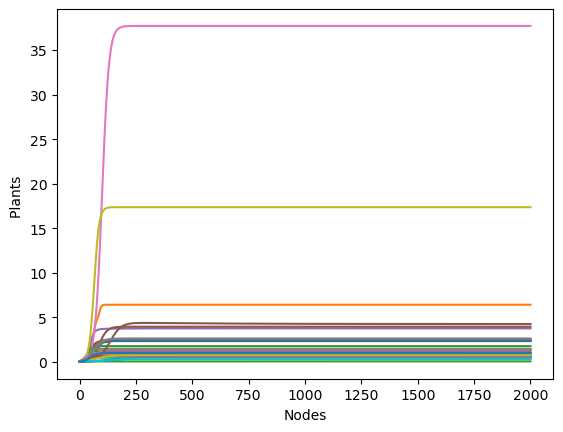

In [9]:
for l in range(0,12*31,12):
    exec(f"plt.plot(time_arraycomp, sln_arraycomp[{l},:])")
plt.title('')
plt.xlabel('Nodes')
plt.ylabel('Plants ')
plt.savefig("Plants3.png", dpi=900)
plt.show()

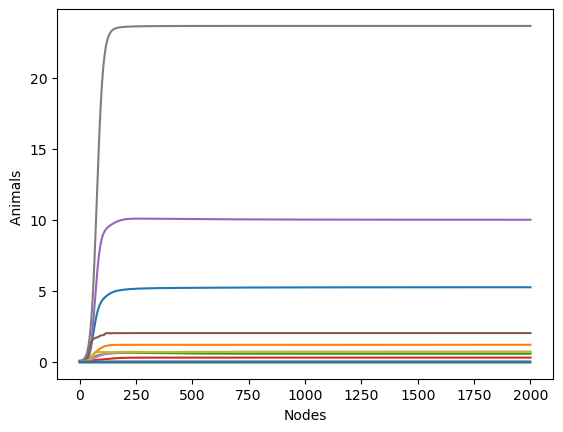

In [10]:
for l in range(1,1+(12*31),12):
    exec(f"plt.plot(time_arraycomp, sln_arraycomp[{l},])")
plt.title('')
plt.xlabel('Nodes')
plt.ylabel('Animals ')
plt.savefig("Animals3.png", dpi=900)
plt.show()

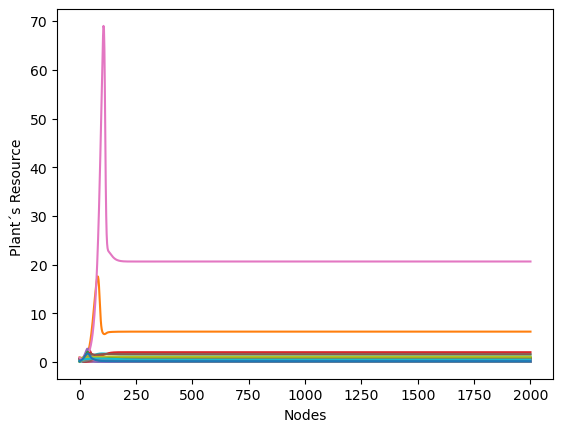

In [11]:
for l in range(2,2+(12*31),12):
    exec(f"plt.plot(time_arraycomp, sln_arraycomp[{l},:])")
plt.title('')
plt.xlabel('Nodes')
plt.ylabel('Plant´s Resource ')
plt.savefig("PlantsR3.png", dpi=900)
plt.show()

In [12]:
b = np.zeros([31,9,1000])

b00=sln_arraycomp[3][:]
b10=sln_arraycomp[15][:]
b20=sln_arraycomp[27][:]
b30=sln_arraycomp[39][:]
b40=sln_arraycomp[51][:]
b50=sln_arraycomp[63][:]
b60=sln_arraycomp[75][:]
b70=sln_arraycomp[87][:]
b80=sln_arraycomp[99][:]
b90=sln_arraycomp[111][:]
b100=sln_arraycomp[123][:]
b110=sln_arraycomp[135][:]
b120=sln_arraycomp[147][:]
b130=sln_arraycomp[159][:]
b140=sln_arraycomp[171][:]
b150=sln_arraycomp[183][:]
b160=sln_arraycomp[195][:]
b170=sln_arraycomp[207][:]
b180=sln_arraycomp[219][:]
b190=sln_arraycomp[231][:]
b200=sln_arraycomp[243][:]
b210=sln_arraycomp[255][:]
b220=sln_arraycomp[267][:]
b230=sln_arraycomp[279][:]
b240=sln_arraycomp[291][:]
b250=sln_arraycomp[303][:]
b260=sln_arraycomp[315][:]
b270=sln_arraycomp[327][:]
b280=sln_arraycomp[339][:]
b290=sln_arraycomp[351][:]
b300=sln_arraycomp[363][:]
b01=sln_arraycomp[4][:]
b11=sln_arraycomp[16][:]
b21=sln_arraycomp[28][:]
b31=sln_arraycomp[40][:]
b41=sln_arraycomp[52][:]
b51=sln_arraycomp[64][:]
b61=sln_arraycomp[76][:]
b71=sln_arraycomp[88][:]
b81=sln_arraycomp[100][:]
b91=sln_arraycomp[112][:]
b101=sln_arraycomp[124][:]
b111=sln_arraycomp[136][:]
b121=sln_arraycomp[148][:]
b131=sln_arraycomp[160][:]
b141=sln_arraycomp[172][:]
b151=sln_arraycomp[184][:]
b161=sln_arraycomp[196][:]
b171=sln_arraycomp[208][:]
b181=sln_arraycomp[220][:]
b191=sln_arraycomp[232][:]
b201=sln_arraycomp[244][:]
b211=sln_arraycomp[256][:]
b221=sln_arraycomp[268][:]
b231=sln_arraycomp[280][:]
b241=sln_arraycomp[292][:]
b251=sln_arraycomp[304][:]
b261=sln_arraycomp[316][:]
b271=sln_arraycomp[328][:]
b281=sln_arraycomp[340][:]
b291=sln_arraycomp[352][:]
b301=sln_arraycomp[364][:]
b02=sln_arraycomp[5][:]
b12=sln_arraycomp[17][:]
b22=sln_arraycomp[29][:]
b32=sln_arraycomp[41][:]
b42=sln_arraycomp[53][:]
b52=sln_arraycomp[65][:]
b62=sln_arraycomp[77][:]
b72=sln_arraycomp[89][:]
b82=sln_arraycomp[101][:]
b92=sln_arraycomp[113][:]
b102=sln_arraycomp[125][:]
b112=sln_arraycomp[137][:]
b122=sln_arraycomp[149][:]
b132=sln_arraycomp[161][:]
b142=sln_arraycomp[173][:]
b152=sln_arraycomp[185][:]
b162=sln_arraycomp[197][:]
b172=sln_arraycomp[209][:]
b182=sln_arraycomp[221][:]
b192=sln_arraycomp[233][:]
b202=sln_arraycomp[245][:]
b212=sln_arraycomp[257][:]
b222=sln_arraycomp[269][:]
b232=sln_arraycomp[281][:]
b242=sln_arraycomp[293][:]
b252=sln_arraycomp[305][:]
b262=sln_arraycomp[317][:]
b272=sln_arraycomp[329][:]
b282=sln_arraycomp[341][:]
b292=sln_arraycomp[353][:]
b302=sln_arraycomp[365][:]
b03=sln_arraycomp[6][:]
b13=sln_arraycomp[18][:]
b23=sln_arraycomp[30][:]
b33=sln_arraycomp[42][:]
b43=sln_arraycomp[54][:]
b53=sln_arraycomp[66][:]
b63=sln_arraycomp[78][:]
b73=sln_arraycomp[90][:]
b83=sln_arraycomp[102][:]
b93=sln_arraycomp[114][:]
b103=sln_arraycomp[126][:]
b113=sln_arraycomp[138][:]
b123=sln_arraycomp[150][:]
b133=sln_arraycomp[162][:]
b143=sln_arraycomp[174][:]
b153=sln_arraycomp[186][:]
b163=sln_arraycomp[198][:]
b173=sln_arraycomp[210][:]
b183=sln_arraycomp[222][:]
b193=sln_arraycomp[234][:]
b203=sln_arraycomp[246][:]
b213=sln_arraycomp[258][:]
b223=sln_arraycomp[270][:]
b233=sln_arraycomp[282][:]
b243=sln_arraycomp[294][:]
b253=sln_arraycomp[306][:]
b263=sln_arraycomp[318][:]
b273=sln_arraycomp[330][:]
b283=sln_arraycomp[342][:]
b293=sln_arraycomp[354][:]
b303=sln_arraycomp[366][:]
b04=sln_arraycomp[7][:]
b14=sln_arraycomp[19][:]
b24=sln_arraycomp[31][:]
b34=sln_arraycomp[43][:]
b44=sln_arraycomp[55][:]
b54=sln_arraycomp[67][:]
b64=sln_arraycomp[79][:]
b74=sln_arraycomp[91][:]
b84=sln_arraycomp[103][:]
b94=sln_arraycomp[115][:]
b104=sln_arraycomp[127][:]
b114=sln_arraycomp[139][:]
b124=sln_arraycomp[151][:]
b134=sln_arraycomp[163][:]
b144=sln_arraycomp[175][:]
b154=sln_arraycomp[187][:]
b164=sln_arraycomp[199][:]
b174=sln_arraycomp[211][:]
b184=sln_arraycomp[223][:]
b194=sln_arraycomp[235][:]
b204=sln_arraycomp[247][:]
b214=sln_arraycomp[259][:]
b224=sln_arraycomp[271][:]
b234=sln_arraycomp[283][:]
b244=sln_arraycomp[295][:]
b254=sln_arraycomp[307][:]
b264=sln_arraycomp[319][:]
b274=sln_arraycomp[331][:]
b284=sln_arraycomp[343][:]
b294=sln_arraycomp[355][:]
b304=sln_arraycomp[367][:]
b05=sln_arraycomp[8][:]
b15=sln_arraycomp[20][:]
b25=sln_arraycomp[32][:]
b35=sln_arraycomp[44][:]
b45=sln_arraycomp[56][:]
b55=sln_arraycomp[68][:]
b65=sln_arraycomp[80][:]
b75=sln_arraycomp[92][:]
b85=sln_arraycomp[104][:]
b95=sln_arraycomp[116][:]
b105=sln_arraycomp[128][:]
b115=sln_arraycomp[140][:]
b125=sln_arraycomp[152][:]
b135=sln_arraycomp[164][:]
b145=sln_arraycomp[176][:]
b155=sln_arraycomp[188][:]
b165=sln_arraycomp[200][:]
b175=sln_arraycomp[212][:]
b185=sln_arraycomp[224][:]
b195=sln_arraycomp[236][:]
b205=sln_arraycomp[248][:]
b215=sln_arraycomp[260][:]
b225=sln_arraycomp[272][:]
b235=sln_arraycomp[284][:]
b245=sln_arraycomp[296][:]
b255=sln_arraycomp[308][:]
b265=sln_arraycomp[320][:]
b275=sln_arraycomp[332][:]
b285=sln_arraycomp[344][:]
b295=sln_arraycomp[356][:]
b305=sln_arraycomp[368][:]
b06=sln_arraycomp[9][:]
b16=sln_arraycomp[21][:]
b26=sln_arraycomp[33][:]
b36=sln_arraycomp[45][:]
b46=sln_arraycomp[57][:]
b56=sln_arraycomp[69][:]
b66=sln_arraycomp[81][:]
b76=sln_arraycomp[93][:]
b86=sln_arraycomp[105][:]
b96=sln_arraycomp[117][:]
b106=sln_arraycomp[129][:]
b116=sln_arraycomp[141][:]
b126=sln_arraycomp[153][:]
b136=sln_arraycomp[165][:]
b146=sln_arraycomp[177][:]
b156=sln_arraycomp[189][:]
b166=sln_arraycomp[201][:]
b176=sln_arraycomp[213][:]
b186=sln_arraycomp[225][:]
b196=sln_arraycomp[237][:]
b206=sln_arraycomp[249][:]
b216=sln_arraycomp[261][:]
b226=sln_arraycomp[273][:]
b236=sln_arraycomp[285][:]
b246=sln_arraycomp[297][:]
b256=sln_arraycomp[309][:]
b266=sln_arraycomp[321][:]
b276=sln_arraycomp[333][:]
b286=sln_arraycomp[345][:]
b296=sln_arraycomp[357][:]
b306=sln_arraycomp[369][:]
b07=sln_arraycomp[10][:]
b17=sln_arraycomp[22][:]
b27=sln_arraycomp[34][:]
b37=sln_arraycomp[46][:]
b47=sln_arraycomp[58][:]
b57=sln_arraycomp[70][:]
b67=sln_arraycomp[82][:]
b77=sln_arraycomp[94][:]
b87=sln_arraycomp[106][:]
b97=sln_arraycomp[118][:]
b107=sln_arraycomp[130][:]
b117=sln_arraycomp[142][:]
b127=sln_arraycomp[154][:]
b137=sln_arraycomp[166][:]
b147=sln_arraycomp[178][:]
b157=sln_arraycomp[190][:]
b167=sln_arraycomp[202][:]
b177=sln_arraycomp[214][:]
b187=sln_arraycomp[226][:]
b197=sln_arraycomp[238][:]
b207=sln_arraycomp[250][:]
b217=sln_arraycomp[262][:]
b227=sln_arraycomp[274][:]
b237=sln_arraycomp[286][:]
b247=sln_arraycomp[298][:]
b257=sln_arraycomp[310][:]
b267=sln_arraycomp[322][:]
b277=sln_arraycomp[334][:]
b287=sln_arraycomp[346][:]
b297=sln_arraycomp[358][:]
b307=sln_arraycomp[370][:]
b08=sln_arraycomp[11][:]
b18=sln_arraycomp[23][:]
b28=sln_arraycomp[35][:]
b38=sln_arraycomp[47][:]
b48=sln_arraycomp[59][:]
b58=sln_arraycomp[71][:]
b68=sln_arraycomp[83][:]
b78=sln_arraycomp[95][:]
b88=sln_arraycomp[107][:]
b98=sln_arraycomp[119][:]
b108=sln_arraycomp[131][:]
b118=sln_arraycomp[143][:]
b128=sln_arraycomp[155][:]
b138=sln_arraycomp[167][:]
b148=sln_arraycomp[179][:]
b158=sln_arraycomp[191][:]
b168=sln_arraycomp[203][:]
b178=sln_arraycomp[215][:]
b188=sln_arraycomp[227][:]
b198=sln_arraycomp[239][:]
b208=sln_arraycomp[251][:]
b218=sln_arraycomp[263][:]
b228=sln_arraycomp[275][:]
b238=sln_arraycomp[287][:]
b248=sln_arraycomp[299][:]
b258=sln_arraycomp[311][:]
b268=sln_arraycomp[323][:]
b278=sln_arraycomp[335][:]
b288=sln_arraycomp[347][:]
b298=sln_arraycomp[359][:]
b308=sln_arraycomp[371][:]

for k in range(1000):
    b[0][0][k]=b00[k]
    b[0][1][k]=b01[k]
    b[0][2][k]=b02[k]
    b[0][3][k]=b03[k]
    b[0][4][k]=b04[k]
    b[0][5][k]=b05[k]
    b[0][6][k]=b06[k]
    b[0][7][k]=b07[k]
    b[0][8][k]=b08[k]
    b[1][0][k]=b10[k]
    b[1][1][k]=b11[k]
    b[1][2][k]=b12[k]
    b[1][3][k]=b13[k]
    b[1][4][k]=b14[k]
    b[1][5][k]=b15[k]
    b[1][6][k]=b16[k]
    b[1][7][k]=b17[k]
    b[1][8][k]=b18[k]
    b[2][0][k]=b20[k]
    b[2][1][k]=b21[k]
    b[2][2][k]=b22[k]
    b[2][3][k]=b23[k]
    b[2][4][k]=b24[k]
    b[2][5][k]=b25[k]
    b[2][6][k]=b26[k]
    b[2][7][k]=b27[k]
    b[2][8][k]=b28[k]
    b[3][0][k]=b30[k]
    b[3][1][k]=b31[k]
    b[3][2][k]=b32[k]
    b[3][3][k]=b33[k]
    b[3][4][k]=b34[k]
    b[3][5][k]=b35[k]
    b[3][6][k]=b36[k]
    b[3][7][k]=b37[k]
    b[3][8][k]=b38[k]
    b[4][0][k]=b40[k]
    b[4][1][k]=b41[k]
    b[4][2][k]=b42[k]
    b[4][3][k]=b43[k]
    b[4][4][k]=b44[k]
    b[4][5][k]=b45[k]
    b[4][6][k]=b46[k]
    b[4][7][k]=b47[k]
    b[4][8][k]=b48[k]
    b[5][0][k]=b50[k]
    b[5][1][k]=b51[k]
    b[5][2][k]=b52[k]
    b[5][3][k]=b53[k]
    b[5][4][k]=b54[k]
    b[5][5][k]=b55[k]
    b[5][6][k]=b56[k]
    b[5][7][k]=b57[k]
    b[5][8][k]=b58[k]
    b[6][0][k]=b60[k]
    b[6][1][k]=b61[k]
    b[6][2][k]=b62[k]
    b[6][3][k]=b63[k]
    b[6][4][k]=b64[k]
    b[6][5][k]=b65[k]
    b[6][6][k]=b66[k]
    b[6][7][k]=b67[k]
    b[6][8][k]=b68[k]
    b[7][0][k]=b70[k]
    b[7][1][k]=b71[k]
    b[7][2][k]=b72[k]
    b[7][3][k]=b73[k]
    b[7][4][k]=b74[k]
    b[7][5][k]=b75[k]
    b[7][6][k]=b76[k]
    b[7][7][k]=b77[k]
    b[7][8][k]=b78[k]
    b[8][0][k]=b80[k]
    b[8][1][k]=b81[k]
    b[8][2][k]=b82[k]
    b[8][3][k]=b83[k]
    b[8][4][k]=b84[k]
    b[8][5][k]=b85[k]
    b[8][6][k]=b86[k]
    b[8][7][k]=b87[k]
    b[8][8][k]=b88[k]
    b[9][0][k]=b90[k]
    b[9][1][k]=b91[k]
    b[9][2][k]=b92[k]
    b[9][3][k]=b93[k]
    b[9][4][k]=b94[k]
    b[9][5][k]=b95[k]
    b[9][6][k]=b96[k]
    b[9][7][k]=b97[k]
    b[9][8][k]=b98[k]
    b[10][0][k]=b100[k]
    b[10][1][k]=b101[k]
    b[10][2][k]=b102[k]
    b[10][3][k]=b103[k]
    b[10][4][k]=b104[k]
    b[10][5][k]=b105[k]
    b[10][6][k]=b106[k]
    b[10][7][k]=b107[k]
    b[10][8][k]=b108[k]
    b[11][0][k]=b110[k]
    b[11][1][k]=b111[k]
    b[11][2][k]=b112[k]
    b[11][3][k]=b113[k]
    b[11][4][k]=b114[k]
    b[11][5][k]=b115[k]
    b[11][6][k]=b116[k]
    b[11][7][k]=b117[k]
    b[11][8][k]=b118[k]
    b[12][0][k]=b120[k]
    b[12][1][k]=b121[k]
    b[12][2][k]=b122[k]
    b[12][3][k]=b123[k]
    b[12][4][k]=b124[k]
    b[12][5][k]=b125[k]
    b[12][6][k]=b126[k]
    b[12][7][k]=b127[k]
    b[12][8][k]=b128[k]
    b[13][0][k]=b130[k]
    b[13][1][k]=b131[k]
    b[13][2][k]=b132[k]
    b[13][3][k]=b133[k]
    b[13][4][k]=b134[k]
    b[13][5][k]=b135[k]
    b[13][6][k]=b136[k]
    b[13][7][k]=b137[k]
    b[13][8][k]=b138[k]
    b[14][0][k]=b140[k]
    b[14][1][k]=b141[k]
    b[14][2][k]=b142[k]
    b[14][3][k]=b143[k]
    b[14][4][k]=b144[k]
    b[14][5][k]=b145[k]
    b[14][6][k]=b146[k]
    b[14][7][k]=b147[k]
    b[14][8][k]=b148[k]
    b[15][0][k]=b150[k]
    b[15][1][k]=b151[k]
    b[15][2][k]=b152[k]
    b[15][3][k]=b153[k]
    b[15][4][k]=b154[k]
    b[15][5][k]=b155[k]
    b[15][6][k]=b156[k]
    b[15][7][k]=b157[k]
    b[15][8][k]=b158[k]
    b[16][0][k]=b160[k]
    b[16][1][k]=b161[k]
    b[16][2][k]=b162[k]
    b[16][3][k]=b163[k]
    b[16][4][k]=b164[k]
    b[16][5][k]=b165[k]
    b[16][6][k]=b166[k]
    b[16][7][k]=b167[k]
    b[16][8][k]=b168[k]
    b[17][0][k]=b170[k]
    b[17][1][k]=b171[k]
    b[17][2][k]=b172[k]
    b[17][3][k]=b173[k]
    b[17][4][k]=b174[k]
    b[17][5][k]=b175[k]
    b[17][6][k]=b176[k]
    b[17][7][k]=b177[k]
    b[17][8][k]=b178[k]
    b[18][0][k]=b180[k]
    b[18][1][k]=b181[k]
    b[18][2][k]=b182[k]
    b[18][3][k]=b183[k]
    b[18][4][k]=b184[k]
    b[18][5][k]=b185[k]
    b[18][6][k]=b186[k]
    b[18][7][k]=b187[k]
    b[18][8][k]=b188[k]
    b[19][0][k]=b190[k]
    b[19][1][k]=b191[k]
    b[19][2][k]=b192[k]
    b[19][3][k]=b193[k]
    b[19][4][k]=b194[k]
    b[19][5][k]=b195[k]
    b[19][6][k]=b196[k]
    b[19][7][k]=b197[k]
    b[19][8][k]=b198[k]
    b[20][0][k]=b200[k]
    b[20][1][k]=b201[k]
    b[20][2][k]=b202[k]
    b[20][3][k]=b203[k]
    b[20][4][k]=b204[k]
    b[20][5][k]=b205[k]
    b[20][6][k]=b206[k]
    b[20][7][k]=b207[k]
    b[20][8][k]=b208[k]
    b[21][0][k]=b210[k]
    b[21][1][k]=b211[k]
    b[21][2][k]=b212[k]
    b[21][3][k]=b213[k]
    b[21][4][k]=b214[k]
    b[21][5][k]=b215[k]
    b[21][6][k]=b216[k]
    b[21][7][k]=b217[k]
    b[21][8][k]=b218[k]
    b[22][0][k]=b220[k]
    b[22][1][k]=b221[k]
    b[22][2][k]=b222[k]
    b[22][3][k]=b223[k]
    b[22][4][k]=b224[k]
    b[22][5][k]=b225[k]
    b[22][6][k]=b226[k]
    b[22][7][k]=b227[k]
    b[22][8][k]=b228[k]
    b[23][0][k]=b230[k]
    b[23][1][k]=b231[k]
    b[23][2][k]=b232[k]
    b[23][3][k]=b233[k]
    b[23][4][k]=b234[k]
    b[23][5][k]=b235[k]
    b[23][6][k]=b236[k]
    b[23][7][k]=b237[k]
    b[23][8][k]=b238[k]
    b[24][0][k]=b240[k]
    b[24][1][k]=b241[k]
    b[24][2][k]=b242[k]
    b[24][3][k]=b243[k]
    b[24][4][k]=b244[k]
    b[24][5][k]=b245[k]
    b[24][6][k]=b246[k]
    b[24][7][k]=b247[k]
    b[24][8][k]=b248[k]
    b[25][0][k]=b250[k]
    b[25][1][k]=b251[k]
    b[25][2][k]=b252[k]
    b[25][3][k]=b253[k]
    b[25][4][k]=b254[k]
    b[25][5][k]=b255[k]
    b[25][6][k]=b256[k]
    b[25][7][k]=b257[k]
    b[25][8][k]=b258[k]
    b[26][0][k]=b260[k]
    b[26][1][k]=b261[k]
    b[26][2][k]=b262[k]
    b[26][3][k]=b263[k]
    b[26][4][k]=b264[k]
    b[26][5][k]=b265[k]
    b[26][6][k]=b266[k]
    b[26][7][k]=b267[k]
    b[26][8][k]=b268[k]
    b[27][0][k]=b270[k]
    b[27][1][k]=b271[k]
    b[27][2][k]=b272[k]
    b[27][3][k]=b273[k]
    b[27][4][k]=b274[k]
    b[27][5][k]=b275[k]
    b[27][6][k]=b276[k]
    b[27][7][k]=b277[k]
    b[27][8][k]=b278[k]
    b[28][0][k]=b280[k]
    b[28][1][k]=b281[k]
    b[28][2][k]=b282[k]
    b[28][3][k]=b283[k]
    b[28][4][k]=b284[k]
    b[28][5][k]=b285[k]
    b[28][6][k]=b286[k]
    b[28][7][k]=b287[k]
    b[28][8][k]=b288[k]
    b[29][0][k]=b290[k]
    b[29][1][k]=b291[k]
    b[29][2][k]=b292[k]
    b[29][3][k]=b293[k]
    b[29][4][k]=b294[k]
    b[29][5][k]=b295[k]
    b[29][6][k]=b296[k]
    b[29][7][k]=b297[k]
    b[29][8][k]=b298[k]
    b[30][0][k]=b300[k]
    b[30][1][k]=b301[k]
    b[30][2][k]=b302[k]
    b[30][3][k]=b303[k]
    b[30][4][k]=b304[k]
    b[30][5][k]=b305[k]
    b[30][6][k]=b306[k]
    b[30][7][k]=b307[k]
    b[30][8][k]=b308[k]

In [13]:
b.shape

(31, 9, 1000)

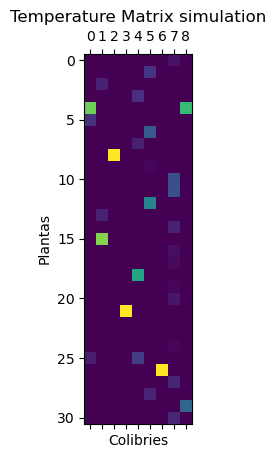

In [14]:
from matplotlib.animation import FuncAnimation

# Definir el tamaño de la matriz y la evolución temporal
rows, cols, time_steps = 31, 9, 1000

# Configuración de la figura
fig, ax = plt.subplots()
cax = ax.matshow(b[:, :, 0], vmin=0, vmax=1, cmap='viridis')
ax.set_title('Time step: 0')

# Función para actualizar la matriz en cada frame
def update(frame):
    cax.set_array(b[:, :, frame])
    ax.set_title(f'Time step: {frame}')
    return cax,

# Crear la animación
ani = FuncAnimation(fig, update, frames=time_steps, blit=True)

# Guardar la animación como un archivo de video
ani.save('evolution_animation03.mp4', writer='ffmpeg', fps=30)

# Mostrar la figura
plt.title('Temperature Matrix simulation')
plt.xlabel('Colibries')
plt.ylabel('Plantas')
#plt.colorbar(label = 'observed frequency in interactions')
plt.show()


In [15]:
def TemperaturetoBiAdjacencyM(Matrix):
    n_species1 = Matrix.shape[0]
    n_species2 = Matrix.shape[1]
    time = Matrix.shape[2]
    size = n_species1+n_species2
    AMatrix = np.zeros([size,size,time])
    for t in range(time-1):
        for i in range(size-1):
            for j in range(size-1):
                if (i<=n_species1-1) and (j>n_species1-1):
                    cerotm = j-(n_species1)
                    AMatrix[i][j][t] = Matrix[i][cerotm][t]
                elif (i>n_species1-1) and (j<=n_species1-1):
                    cerotm2 = i-(n_species1)
                    AMatrix[i][j][t] = Matrix[j][cerotm2][t]
    return AMatrix

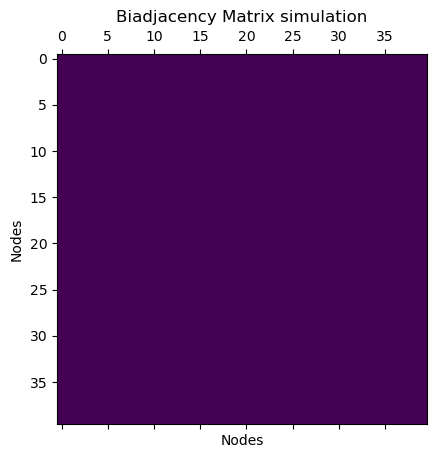

In [16]:
Aevolve = TemperaturetoBiAdjacencyM(b)

# Definir el tamaño de la matriz y la evolución temporal
rows, cols, time_steps = 31, 9, 1000

# Configuración de la figura
fig, ax = plt.subplots()
cax = ax.matshow(Aevolve[:, :, 0], vmin=0, vmax=1, cmap='viridis')
ax.set_title('Time step: 0')

# Función para actualizar la matriz en cada frame
def update(frame):
    cax.set_array(Aevolve[:, :, frame])
    ax.set_title(f'Time step: {frame}')
    return cax,

# Crear la animación
ani = FuncAnimation(fig, update, frames=time_steps, blit=True)

# Guardar la animación como un archivo de video
ani.save('evolution_animationf3.mp4', writer='ffmpeg', fps=30)

# Mostrar la figura
plt.title('Biadjacency Matrix simulation')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
#plt.colorbar(label = 'observed frequency in interactions')
plt.show()

In [17]:
def makebinarymatrix(MatrixtoBin, umbral=1e-10):
    BiMatrix = np.zeros([np.int_(MatrixtoBin.shape[0]),np.int_(MatrixtoBin.shape[1])])
    for i in range(MatrixtoBin.shape[0]):
        for j in range(MatrixtoBin.shape[1]):
            if abs(MatrixtoBin[i][j]) > umbral:
                BiMatrix[i][j] = 1
    return (BiMatrix)

In [18]:
import sys
sys.path.append('./nestedness')
from nestedness_calculator import NestednessCalculator

In [19]:
def eliminar_nulas(matriz):
    # Asegurarse de que la entrada sea un ndarray
    if not isinstance(matriz, np.ndarray):
        raise ValueError("La matriz debe ser un objeto numpy.ndarray")
    
    # Eliminar filas nulas
    filas_validas = matriz[np.any(matriz != 0, axis=1)]
    
    # Si no quedan filas válidas, devolver un ndarray vacío
    if filas_validas.size == 0:
        return np.empty((0, 0))
    
    # Eliminar columnas nulas
    columnas_validas = np.any(filas_validas != 0, axis=0)
    matriz_resultante = filas_validas[:, columnas_validas]

    return matriz_resultante

In [20]:
nestednessevolve = []
modularityevolve = []
for tind in range(999):
    Ttempbin = makebinarymatrix(b[:,:,tind])
    Ttemprfornest = eliminar_nulas(Ttempbin)
    nestednessevolve.append(NestednessCalculator(Ttemprfornest).nodf(Ttemprfornest))
    Atemp = Aevolve[:,:,tind]
    Gtemp = nx.from_numpy_array(Atemp)
    ptemp = nx.community.greedy_modularity_communities(Gtemp)
    modularityevolve.append(nx.community.modularity(Gtemp, ptemp, weight='weight', resolution=.1))
    
    #Liberar Memoria
    Ttempbin = 0
    Ttemprfornest = 0
    Atemp = 0
    Gtemp = 0
    ptemp = 0


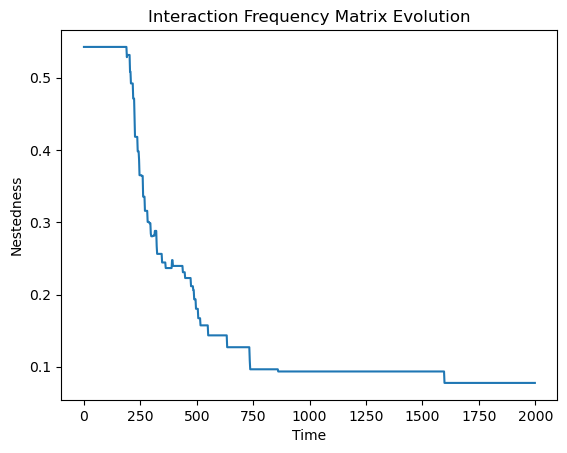

In [21]:
plt.plot(t[:999], nestednessevolve[:999])
plt.title('Interaction Frequency Matrix Evolution')
plt.xlabel('Time')
plt.ylabel('Nestedness')
plt.savefig("Nestedness3.png", dpi=900)
plt.show()

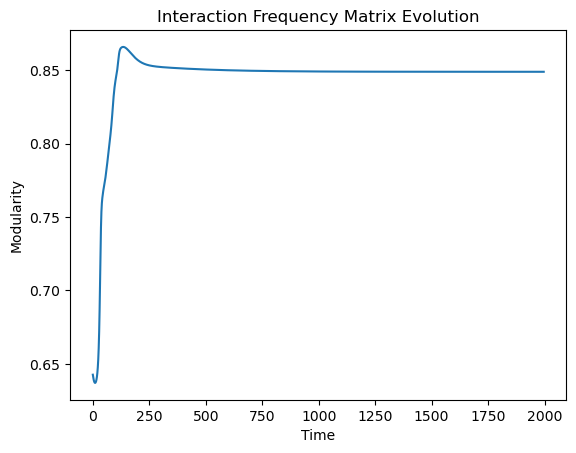

In [22]:
plt.plot(t[:998], modularityevolve[:998])
plt.title('Interaction Frequency Matrix Evolution')
plt.xlabel('Time')
plt.ylabel('Modularity')
plt.savefig("Modularity3.png", dpi=900)
plt.show()